In [1]:
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Configuración
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("df_final.csv")
df.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,date_birth,salary,remote_work,iter_hourly_rate,iter_total_working_years,iter_monthly_income,iter_salary,knn_hourly_rate,knn_total_working_years,knn_monthly_income,knn_salary
0,51,no,NaN,2015.72,NaN,6,3,NaN,1,low,female,251.967241,high,executive,research_director,high,NaN,16280.830000,42330.17,7,no,13,"3,0",high,full_time,0,30.039744,5,good,20,15,15,1972,195370.000000,yes,83.042302,11.318934,16280.830000,195370.000000,83.042302,11.318934,16280.830000,195370.000000
1,52,no,NaN,2063.39,NaN,1,4,life_sciences,2,high,female,257.925812,medium,executive,manager,high,NaN,17117.127783,43331.17,0,no,14,"3,0",low,part_time,1,34.000000,5,good,33,11,9,1971,199990.000000,yes,83.042302,34.000000,5697.600227,199990.000000,83.042302,34.000000,5697.600227,199990.000000
2,42,no,travel_rarely,1984.25,research_&_development,4,2,technical_degree,3,high,female,248.033353,high,executive,manager,very_high,married,16468.252120,41669.33,1,no,11,"3,0",very_high,part_time,0,22.000000,3,good,22,11,15,1981,192320.000000,yes,83.042302,22.000000,5697.600227,192320.000000,83.042302,22.000000,5697.600227,192320.000000
3,47,no,travel_rarely,1771.40,NaN,2,4,medical,4,low,male,221.426998,high,manager,research_director,high,married,14307.500000,37199.50,3,no,19,"3,0",medium,full_time,2,26.672707,2,good,20,5,6,1976,171690.000000,no,83.042302,11.318934,14307.500000,171690.000000,83.042302,11.318934,14307.500000,171690.000000
4,46,no,NaN,1582.77,NaN,3,3,technical_degree,5,low,male,102.958162,very_high,manager,sales_executive,low,divorced,12783.920000,33238.20,2,no,12,"3,0",very_high,part_time,1,11.260715,5,good,19,2,8,1977,79832.804746,no,83.042302,11.318934,12783.920000,65245.875313,83.042302,11.318934,12783.920000,65245.875313


## PRIMERA SLIDE

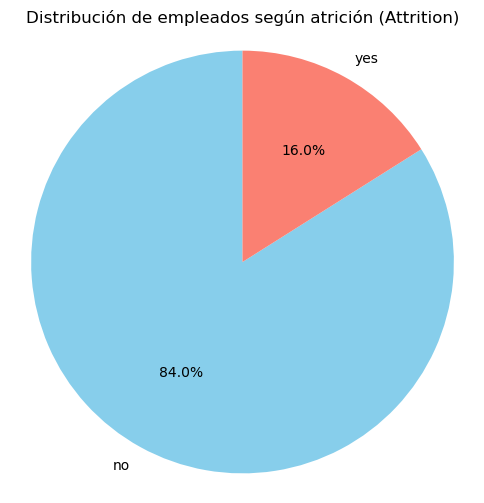

In [3]:
# 1. ¿Cómo se distribuye el abondono entre los empleados?
conteo=df['attrition'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=conteo.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title("Distribución de empleados según atrición (Attrition)") # cambié el nombre al de español y le dejé el de inglés entre paréntesis
plt.axis('equal')  
plt.show()

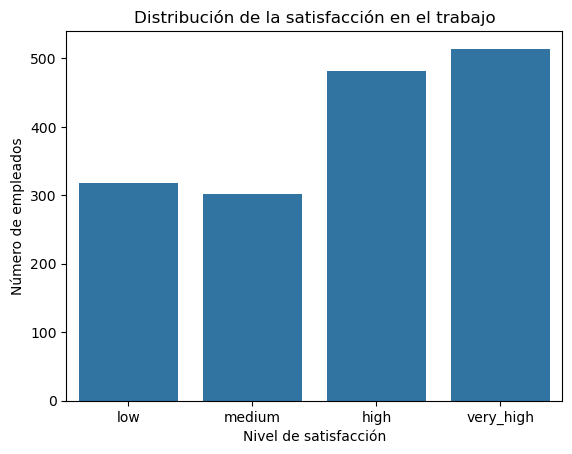

In [4]:
# 2. ¿Cómo se distribuye la satisfacción entre los empleados?
orden_satisfaccion = ['low', 'medium', 'high', 'very_high']
sns.countplot(data=df, x='job_satisfaction', order=orden_satisfaccion)
plt.title('Distribución de la satisfacción en el trabajo')
plt.xlabel('Nivel de satisfacción')
plt.ylabel('Número de empleados')
plt.show()

## SEGUNDA SLIDE

In [5]:
# 3. 
cross_tab_col_percent = pd.crosstab(df['attrition'], df['job_satisfaction'], normalize='index') * 100
print(cross_tab_col_percent)

job_satisfaction       high        low     medium  very_high
attrition                                                   
no                29.889299  18.228782  18.376384  33.505535
yes               29.343629  27.027027  20.463320  23.166023


In [6]:
cross_tab_col_percent = pd.crosstab(df['attrition'], df['job_satisfaction'], normalize='columns') * 100
print(cross_tab_col_percent)

job_satisfaction       high        low     medium  very_high
attrition                                                   
no                84.199584  77.917981  82.450331  88.326848
yes               15.800416  22.082019  17.549669  11.673152


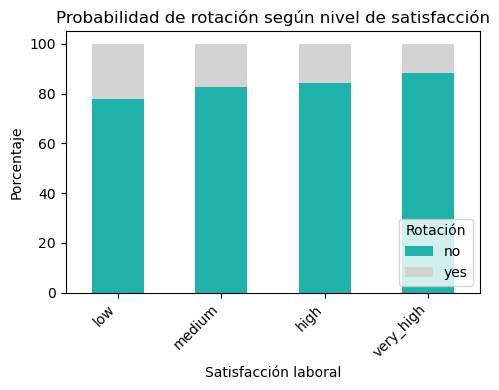

In [7]:
# Define el orden deseado
orden_satisfaccion = ['low', 'medium', 'high', 'very_high']

# Asegúrate de que la columna sea un categórico con ese orden
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=orden_satisfaccion, ordered=True)

# Definir colores
colores = ['lightseagreen', 'lightgray']

# Crear la crosstab y normalizar
crosstab_df = pd.crosstab(df['job_satisfaction'], df['attrition'], normalize='index') * 100

# Graficar
ax = crosstab_df.plot(kind='bar', stacked=True, figsize=(5, 4), color=colores)

# Títulos y etiquetas
plt.title('Probabilidad de rotación según nivel de satisfacción')
plt.xlabel('Satisfacción laboral')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45, ha='right')

# Leyenda en la esquina inferior derecha
ax.legend(title='Rotación', loc='lower right')

plt.tight_layout()
plt.show()

## Cuarta SLIDE

In [8]:
df = pd.read_csv("df_final.csv")
#df = df[df['attrition'] == 'yes']

Relación entre las variables numéricas y job_satisfaction

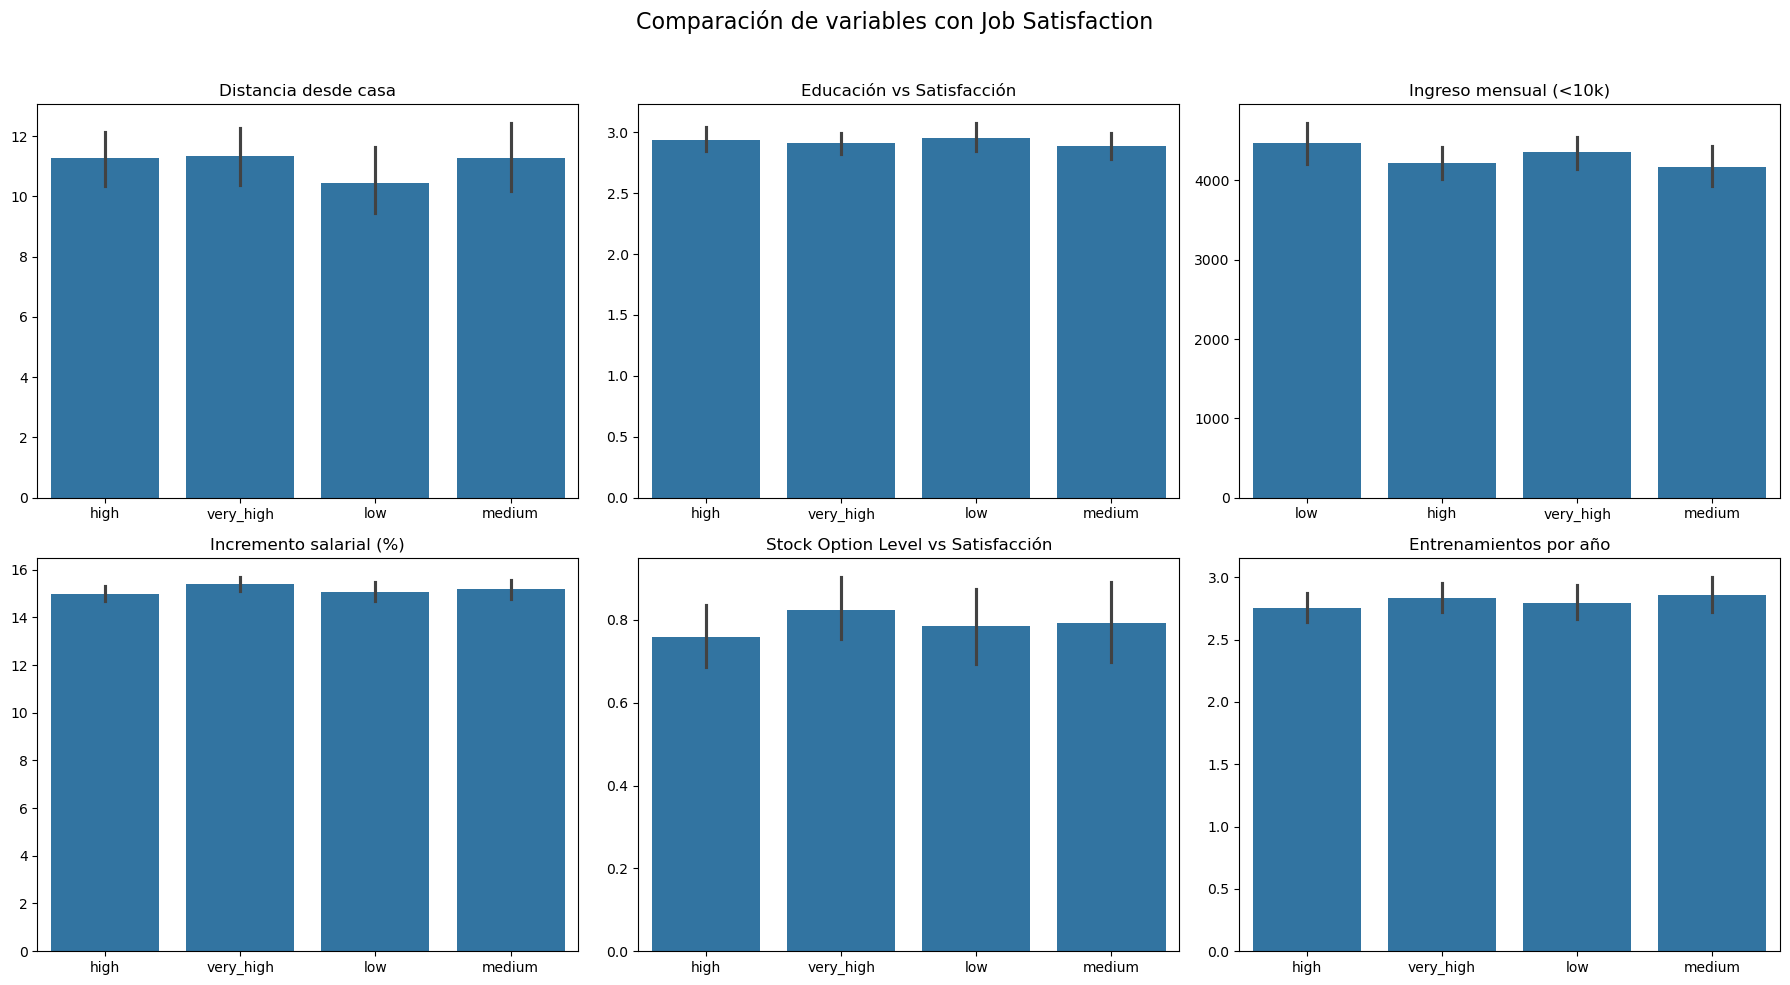

In [9]:
# Opcional: filtrar MonthlyIncome para evitar outliers extremos
df_filtered = df[df['monthly_income'] < 10000]
# df_filtered = df[df['attrition'] == 'yes']

# Crear figura con subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Comparación de variables con Job Satisfaction', fontsize=16)

# 1. DistanceFromHome
sns.barplot(ax=axes[0, 0], data=df, x='job_satisfaction', y='distance_from_home')
axes[0, 0].set_title('Distancia desde casa')

# 2. Education
sns.barplot(ax=axes[0, 1], data=df, y='education', x='job_satisfaction')
axes[0, 1].set_title('Educación vs Satisfacción')

# 3. MonthlyIncome (filtrado)
sns.barplot(ax=axes[0, 2], data=df_filtered, x='job_satisfaction', y='monthly_income')
axes[0, 2].set_title('Ingreso mensual (<10k)')

# 4. PercentSalaryHike
sns.barplot(ax=axes[1, 0], data=df, x='job_satisfaction', y='percent_salary_hike')
axes[1, 0].set_title('Incremento salarial (%)')

# 5. StockOptionLevel
sns.barplot(ax=axes[1, 1], data=df, y='stock_option_level', x='job_satisfaction')
axes[1, 1].set_title('Stock Option Level vs Satisfacción')

# 6. TrainingTimesLastYear
sns.barplot(ax=axes[1, 2], data=df, y='training_times_last_year', x='job_satisfaction')
axes[1, 2].set_title('Entrenamientos por año')

# Ajustes generales
for ax in axes.flat:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

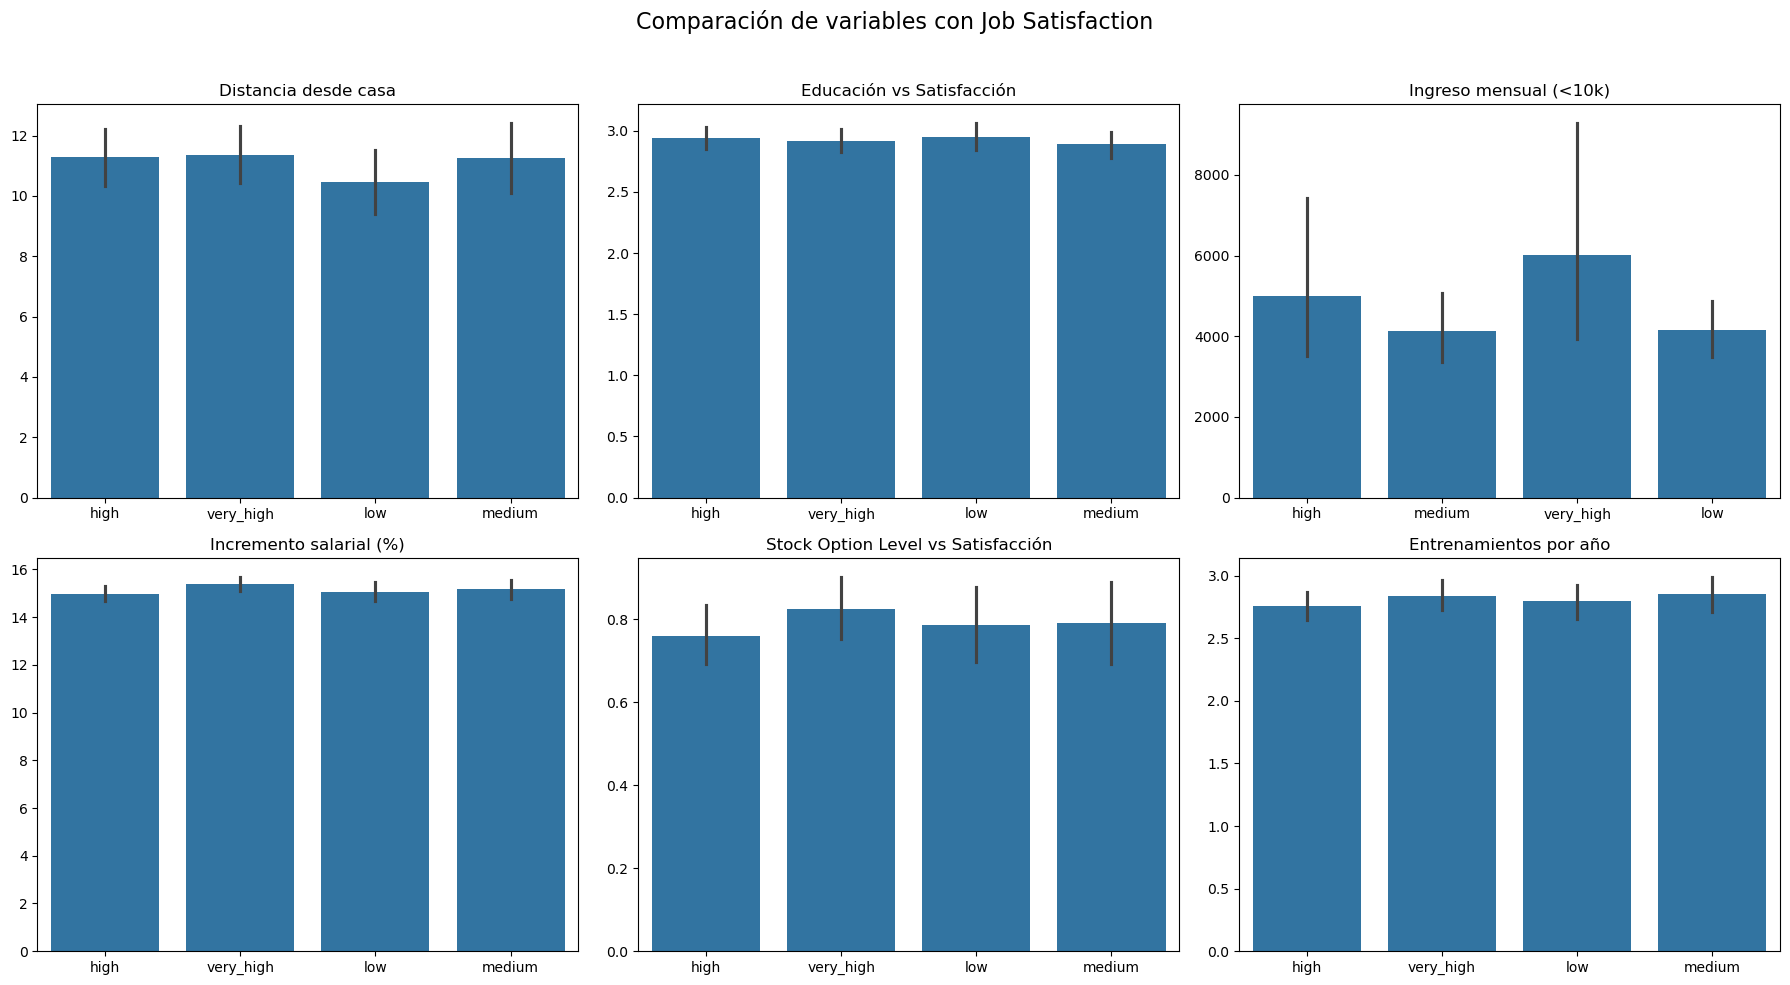

In [10]:
# Opcional: filtrar MonthlyIncome para evitar outliers extremos
#df_filtered = df[df['monthly_income'] < 10000]
df_filtered = df[df['attrition'] == 'yes']

# Crear figura con subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Comparación de variables con Job Satisfaction', fontsize=16)

# 1. DistanceFromHome
sns.barplot(ax=axes[0, 0], data=df, x='job_satisfaction', y='distance_from_home')
axes[0, 0].set_title('Distancia desde casa')

# 2. Education
sns.barplot(ax=axes[0, 1], data=df, y='education', x='job_satisfaction')
axes[0, 1].set_title('Educación vs Satisfacción')

# 3. MonthlyIncome (filtrado)
sns.barplot(ax=axes[0, 2], data=df_filtered, x='job_satisfaction', y='monthly_income')
axes[0, 2].set_title('Ingreso mensual (<10k)')

# 4. PercentSalaryHike
sns.barplot(ax=axes[1, 0], data=df, x='job_satisfaction', y='percent_salary_hike')
axes[1, 0].set_title('Incremento salarial (%)')

# 5. StockOptionLevel
sns.barplot(ax=axes[1, 1], data=df, y='stock_option_level', x='job_satisfaction')
axes[1, 1].set_title('Stock Option Level vs Satisfacción')

# 6. TrainingTimesLastYear
sns.barplot(ax=axes[1, 2], data=df, y='training_times_last_year', x='job_satisfaction')
axes[1, 2].set_title('Entrenamientos por año')

# Ajustes generales
for ax in axes.flat:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [11]:
#df = pd.read_csv("df_final.csv")
#df = df[df['attrition'] == 'yes']

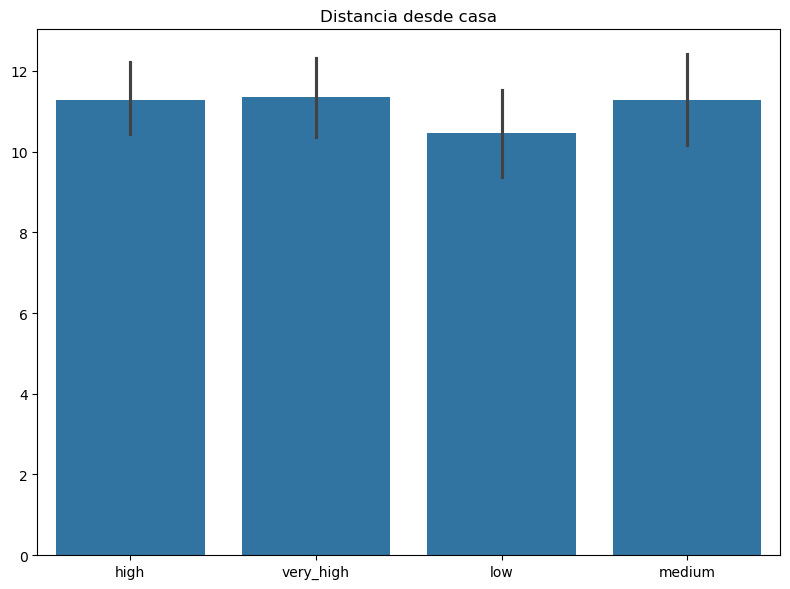

In [12]:
# Crear figura individual para DistanceFromHome vs Job Satisfaction
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(ax=ax, data=df, x='job_satisfaction', y='distance_from_home')
ax.set_title('Distancia desde casa')
ax.set_xlabel('')
ax.set_ylabel('')

# Ajustes generales
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

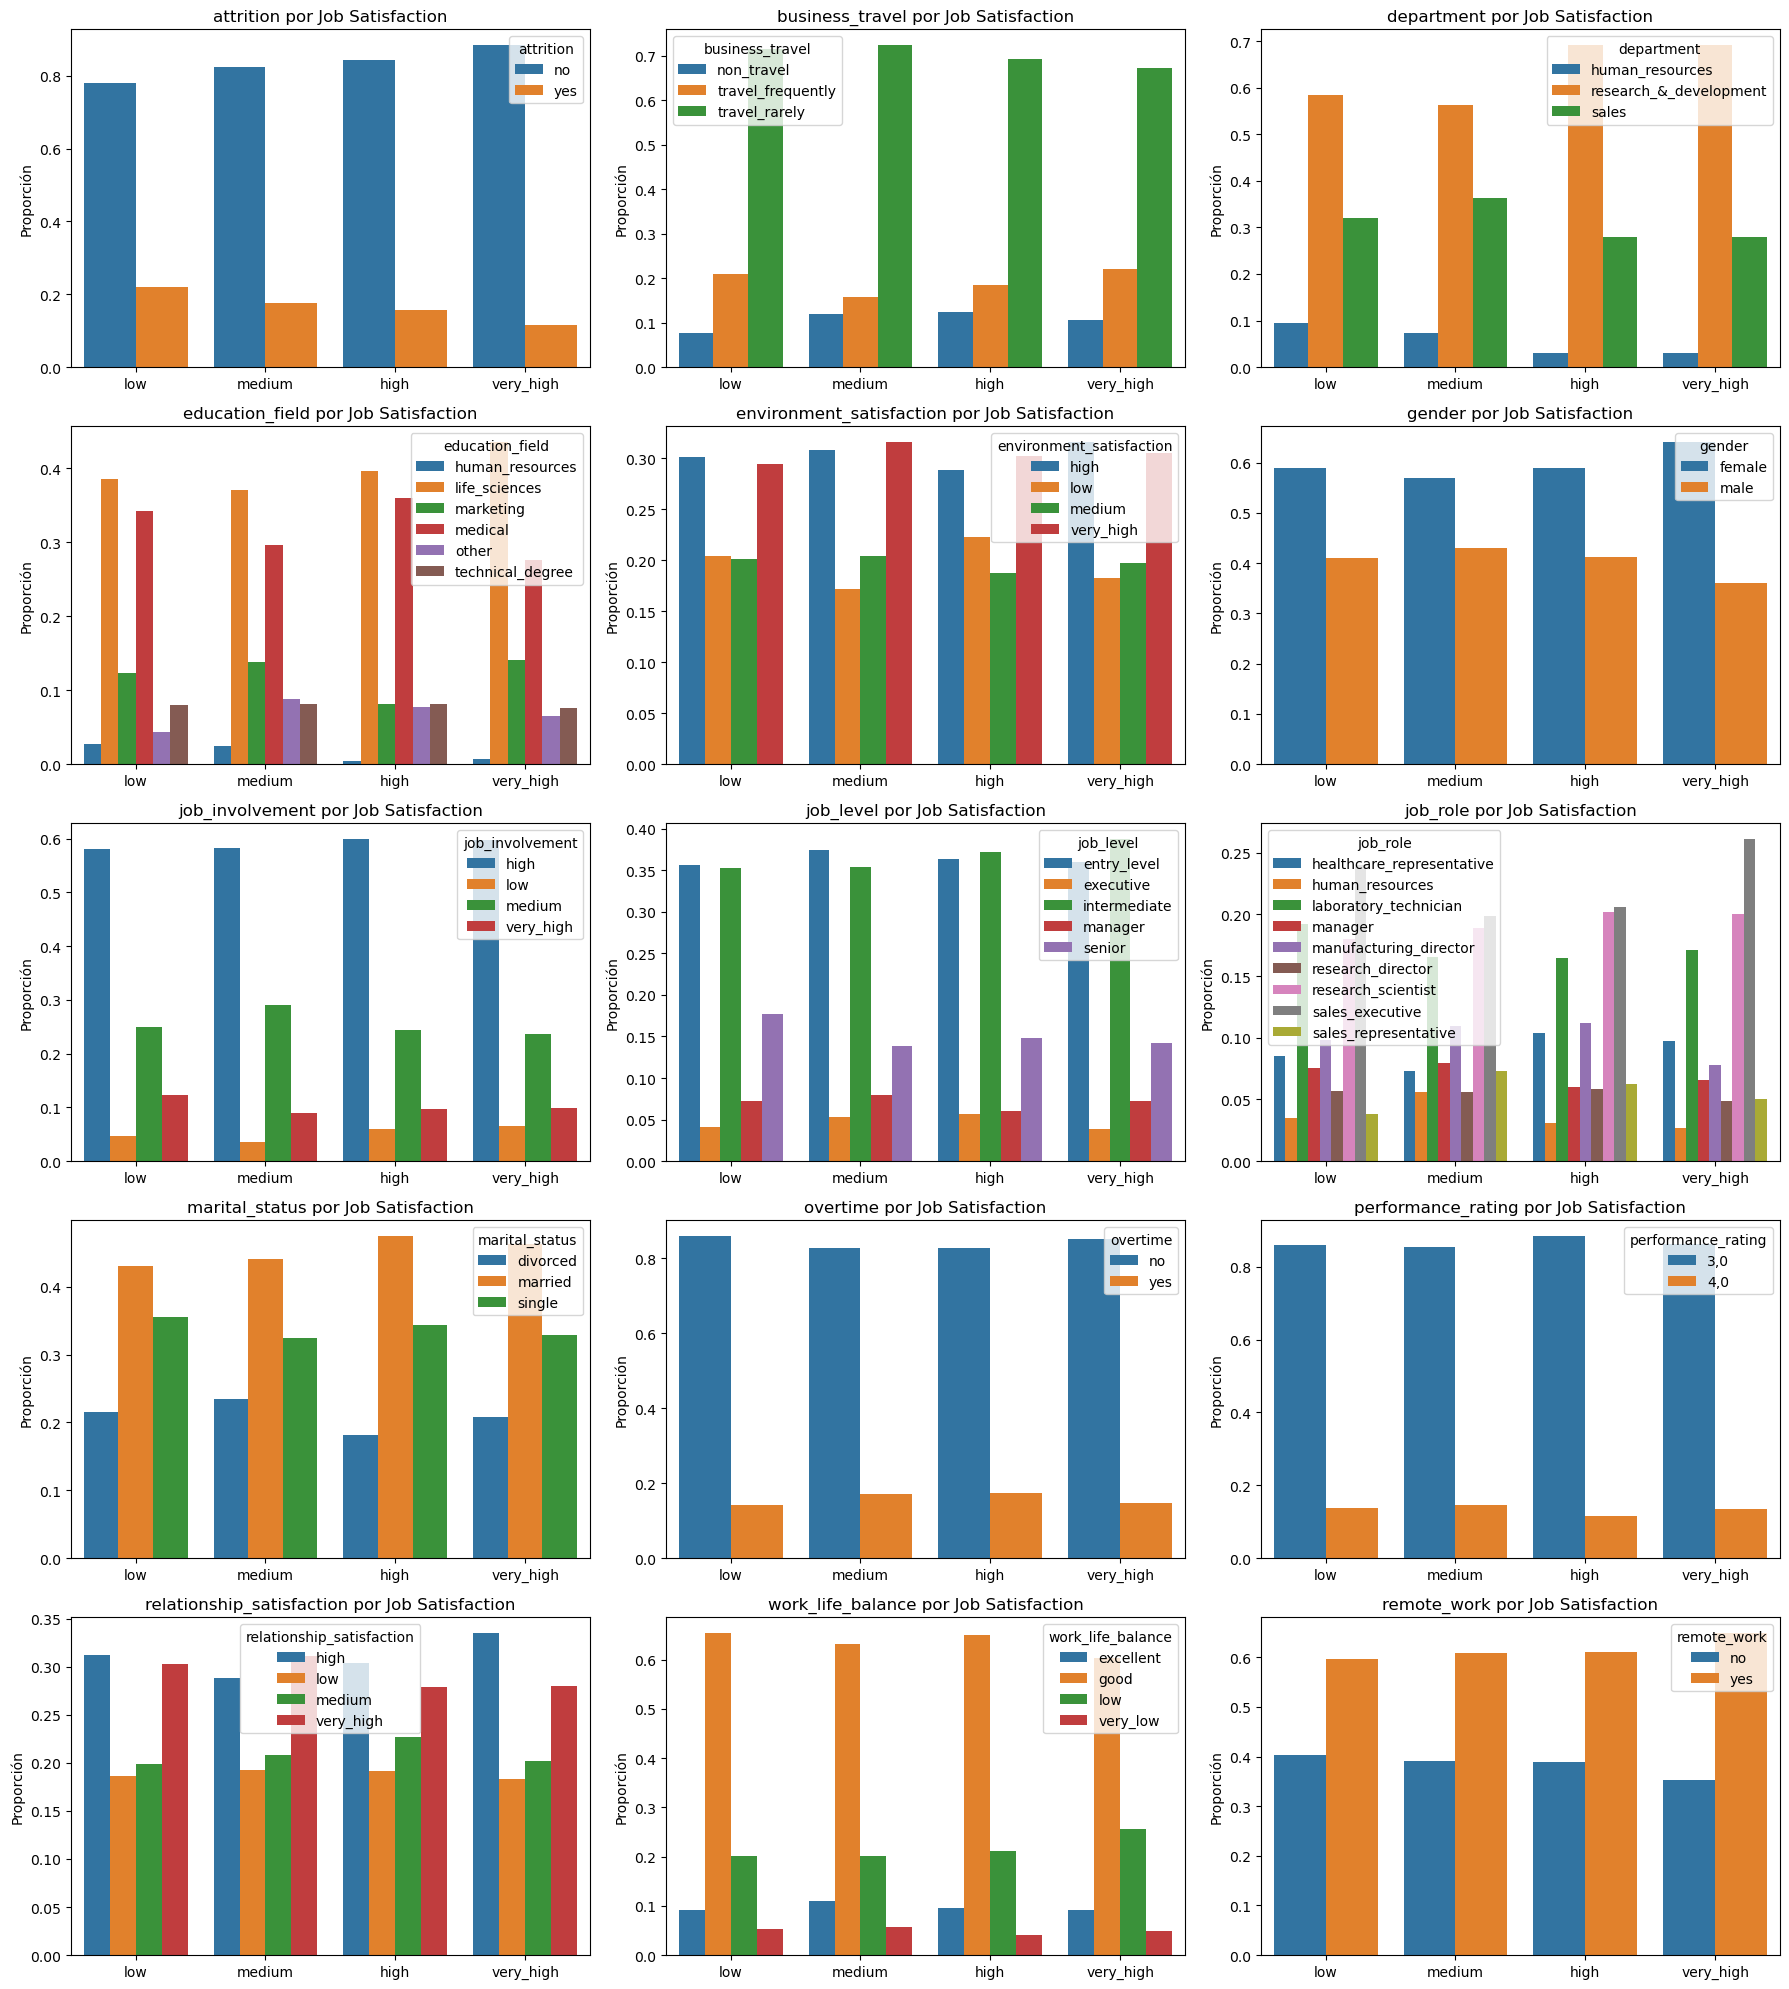

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Definir el orden correcto de los niveles de satisfacción
orden_satisfaccion = ['low', 'medium', 'high', 'very_high']

# Convertir la columna en categórica ordenada
df['job_satisfaction'] = df['job_satisfaction'].str.strip().str.lower()  # Por si acaso
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=orden_satisfaccion, ordered=True)

# Lista de columnas a comparar con 'job_satisfaction'
cols = [
    'attrition', 'business_travel', 'department', 'education_field',
    'environment_satisfaction', 'gender', 'job_involvement', 'job_level',
    'job_role', 'marital_status', 'overtime', 'performance_rating',
    'relationship_satisfaction', 'work_life_balance', 'remote_work'
]

# Número de gráficos por fila
ncols = 3
nrows = -(-len(cols) // ncols)

# Crear subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4))
axes = axes.flatten()

# Crear visualizaciones con barplot
for i, col in enumerate(cols):
    ax = axes[i]
    try:
        # Si es categórica → % distribución por nivel de satisfacción
        if df[col].dtype == 'object' or df[col].nunique() < 10:
            # Calcular proporciones por grupo de satisfacción
            prop_df = df.groupby(['job_satisfaction', col]).size().reset_index(name='count')
            total_per_group = prop_df.groupby('job_satisfaction')['count'].transform('sum')
            prop_df['percentage'] = prop_df['count'] / total_per_group

            sns.barplot(
                data=prop_df,
                x='job_satisfaction',
                y='percentage',
                hue=col,
                ax=ax,
                order=orden_satisfaccion  # Asegura el orden correcto
            )
            ax.set_ylabel('Proporción')
            ax.set_title(f'{col} por Job Satisfaction')

        else:
            # Si es numérica → media por grupo de satisfacción
            sns.barplot(
                data=df,
                x='job_satisfaction',
                y=col,
                ax=ax,
                estimator='mean',
                order=orden_satisfaccion
            )
            ax.set_ylabel(f'Media de {col}')
            ax.set_title(f'Media de {col} por Job Satisfaction')

        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=0)
    except Exception as e:
        ax.set_visible(False)
        print(f'Error al graficar {col}: {e}')

# Ocultar subplots vacíos
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

orden_satisfaccion = ['low', 'medium', 'high', 'very_high']
df['job_satisfaction'] = df['job_satisfaction'].str.strip().str.lower()
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=orden_satisfaccion, ordered=True)

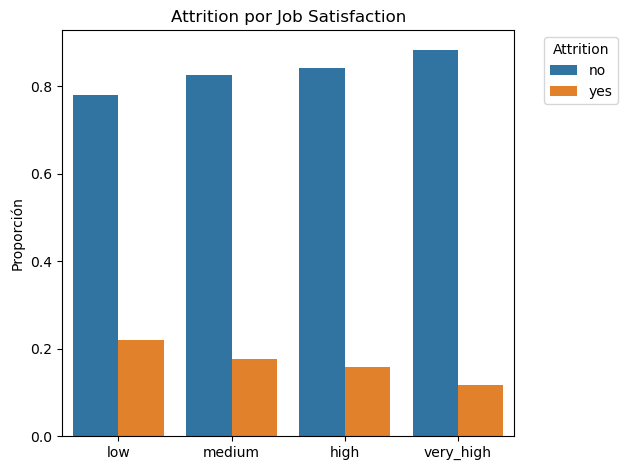

In [15]:
prop_df = df.groupby(['job_satisfaction', 'attrition']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='attrition', order=orden_satisfaccion)
plt.title('Attrition por Job Satisfaction')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Attrition')
plt.tight_layout()
plt.show()

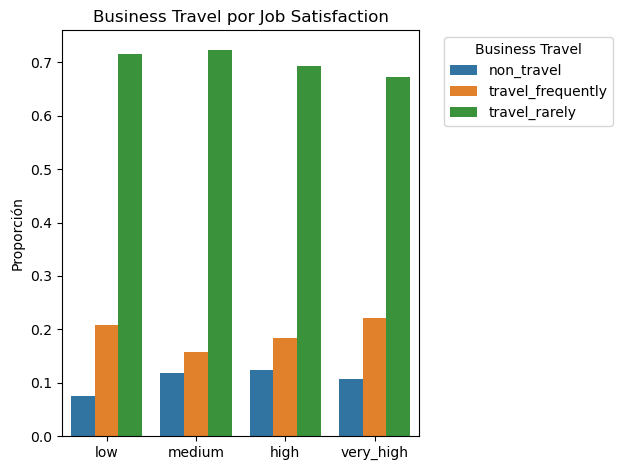

In [16]:
prop_df = df.groupby(['job_satisfaction', 'business_travel']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='business_travel', order=orden_satisfaccion)
plt.title('Business Travel por Job Satisfaction')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Business Travel')
plt.tight_layout()
plt.show()

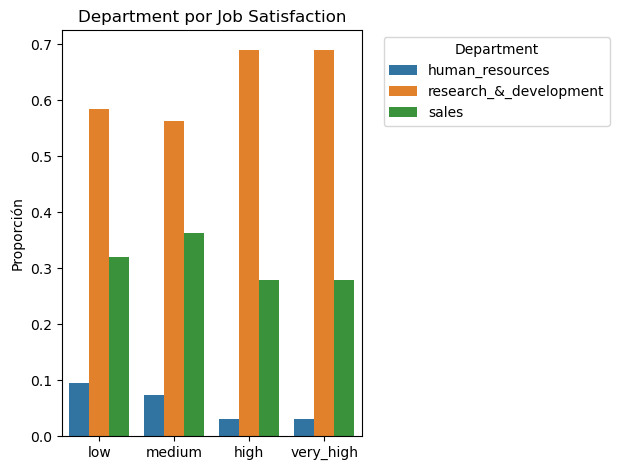

In [17]:
prop_df = df.groupby(['job_satisfaction', 'department']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='department', order=orden_satisfaccion)
plt.title('Department por Job Satisfaction')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Department')
plt.tight_layout()
plt.show()

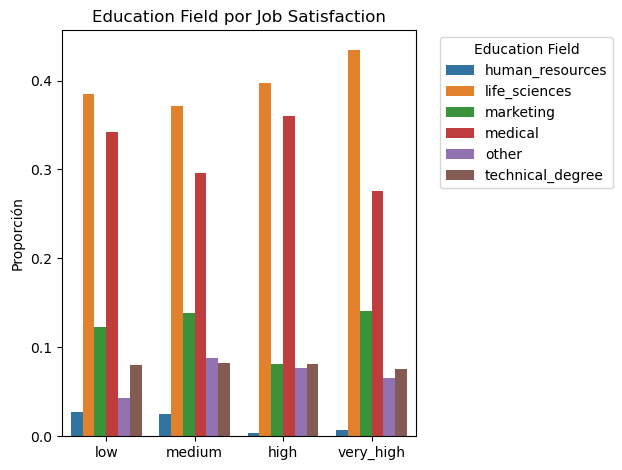

In [18]:
prop_df = df.groupby(['job_satisfaction', 'education_field']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='education_field', order=orden_satisfaccion)
plt.title('Education Field por Job Satisfaction')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Education Field')
plt.tight_layout()
plt.show()

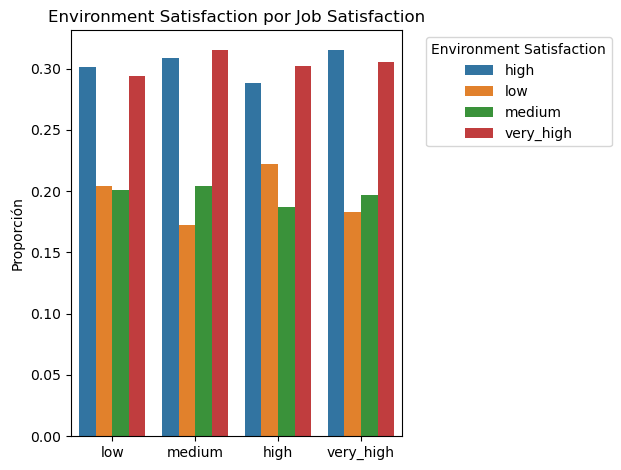

In [19]:
prop_df = df.groupby(['job_satisfaction', 'environment_satisfaction']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='environment_satisfaction', order=orden_satisfaccion)
plt.title('Environment Satisfaction por Job Satisfaction')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Environment Satisfaction')
plt.tight_layout()
plt.show()

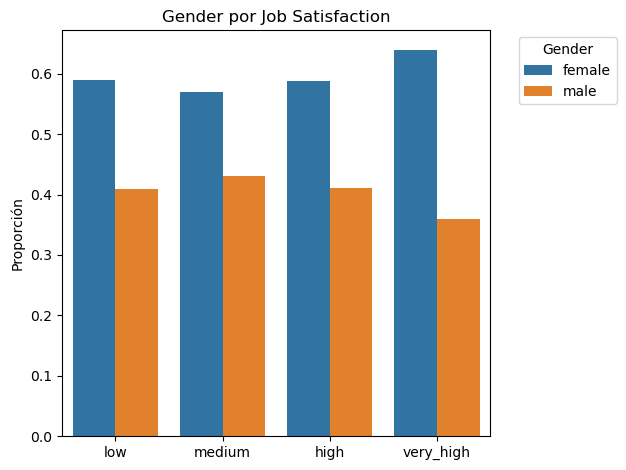

In [20]:
prop_df = df.groupby(['job_satisfaction', 'gender']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='gender', order=orden_satisfaccion)
plt.title('Gender por Job Satisfaction')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Gender')
plt.tight_layout()
plt.show()

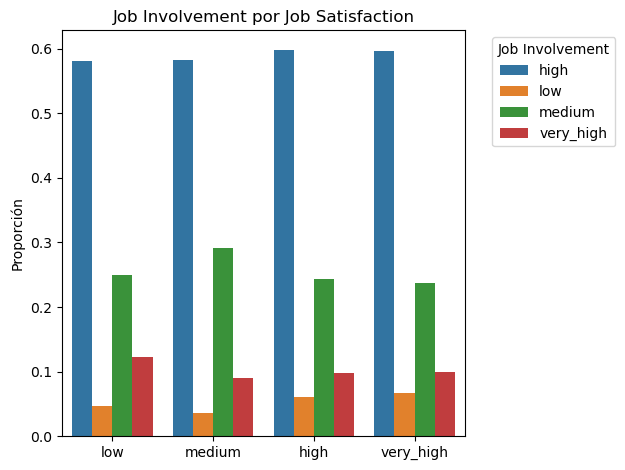

In [21]:
prop_df = df.groupby(['job_satisfaction', 'job_involvement']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='job_involvement', order=orden_satisfaccion)
plt.title('Job Involvement por Job Satisfaction')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Job Involvement')
plt.tight_layout()
plt.show()

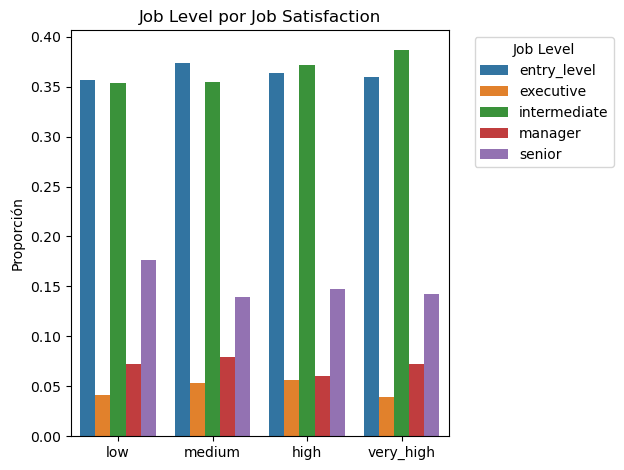

In [22]:
prop_df = df.groupby(['job_satisfaction', 'job_level']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='job_level', order=orden_satisfaccion)
plt.title('Job Level por Job Satisfaction')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Job Level')
plt.tight_layout()
plt.show()

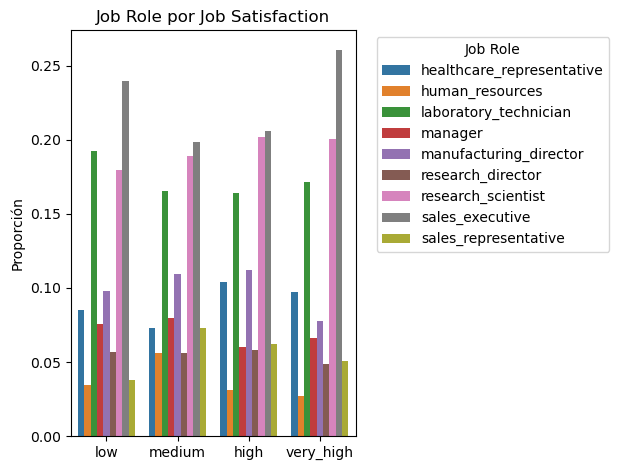

In [23]:
prop_df = df.groupby(['job_satisfaction', 'job_role']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='job_role', order=orden_satisfaccion)
plt.title('Job Role por Job Satisfaction')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Job Role')
plt.tight_layout()
plt.show()

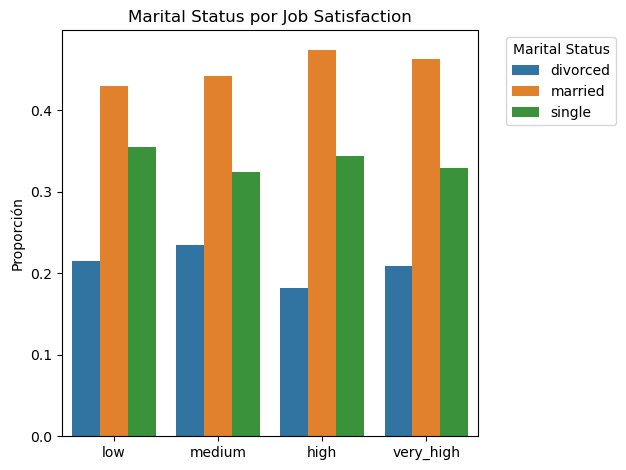

In [24]:
prop_df = df.groupby(['job_satisfaction', 'marital_status']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='marital_status', order=orden_satisfaccion)
plt.title('Marital Status por Job Satisfaction')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Marital Status')
plt.tight_layout()
plt.show()

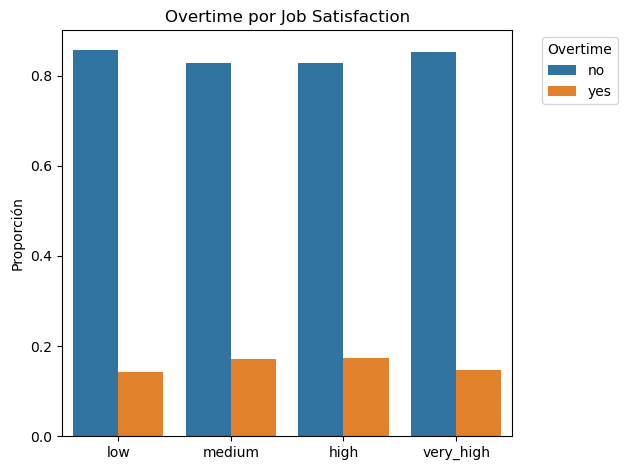

In [25]:
prop_df = df.groupby(['job_satisfaction', 'overtime']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='overtime', order=orden_satisfaccion)
plt.title('Overtime por Job Satisfaction')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Overtime')
plt.tight_layout()
plt.show()

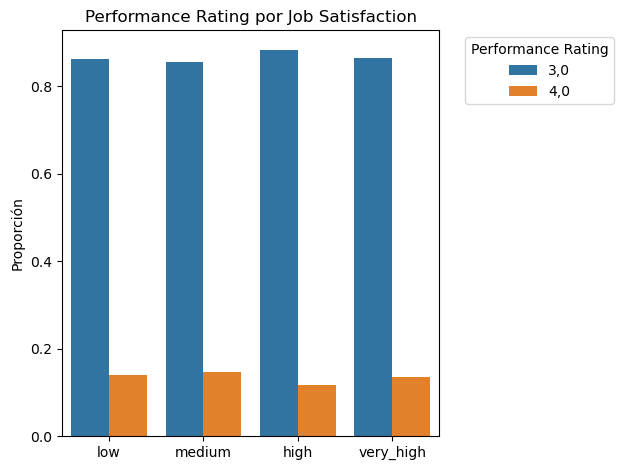

In [26]:
prop_df = df.groupby(['job_satisfaction', 'performance_rating']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='performance_rating', order=orden_satisfaccion)
plt.title('Performance Rating por Job Satisfaction')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Performance Rating')
plt.tight_layout()
plt.show()

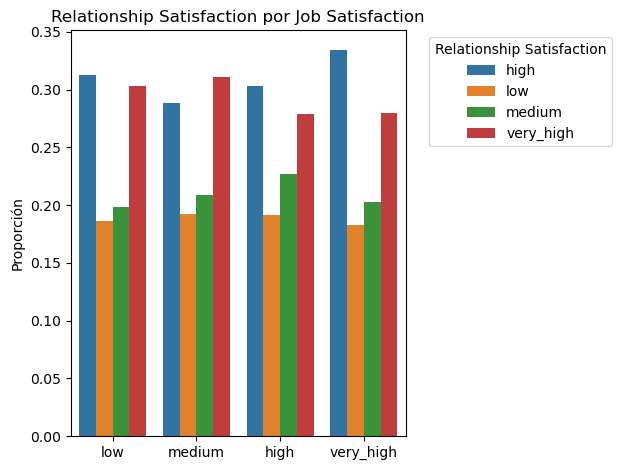

In [27]:
prop_df = df.groupby(['job_satisfaction', 'relationship_satisfaction']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='relationship_satisfaction', order=orden_satisfaccion)
plt.title('Relationship Satisfaction por Job Satisfaction')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Relationship Satisfaction')
plt.tight_layout()
plt.show()

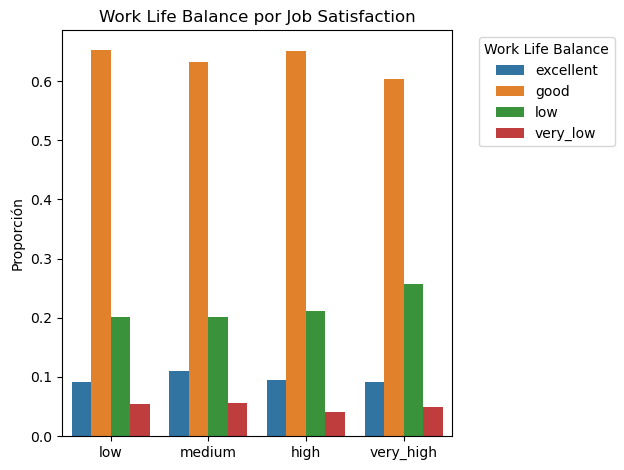

In [28]:
prop_df = df.groupby(['job_satisfaction', 'work_life_balance']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='work_life_balance', order=orden_satisfaccion)
plt.title('Work Life Balance por Job Satisfaction')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Work Life Balance')
plt.tight_layout()
plt.show()

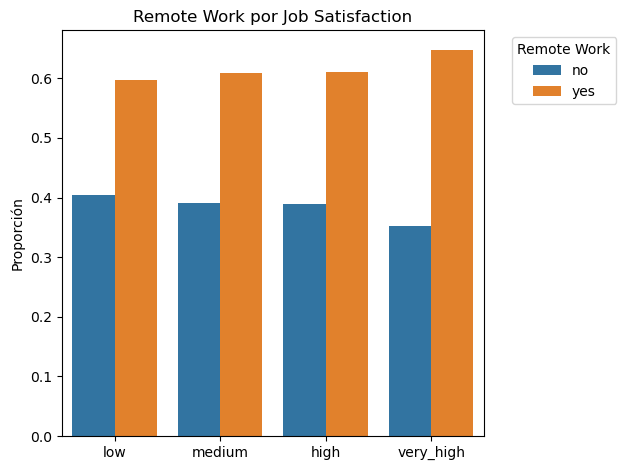

In [29]:
prop_df = df.groupby(['job_satisfaction', 'remote_work']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='remote_work', order=orden_satisfaccion)
plt.title('Remote Work por Job Satisfaction')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Remote Work')
plt.tight_layout()
plt.show()

In [30]:
#df = pd.read_csv("df_final.csv")
#df = df[df['attrition'] == 'yes']

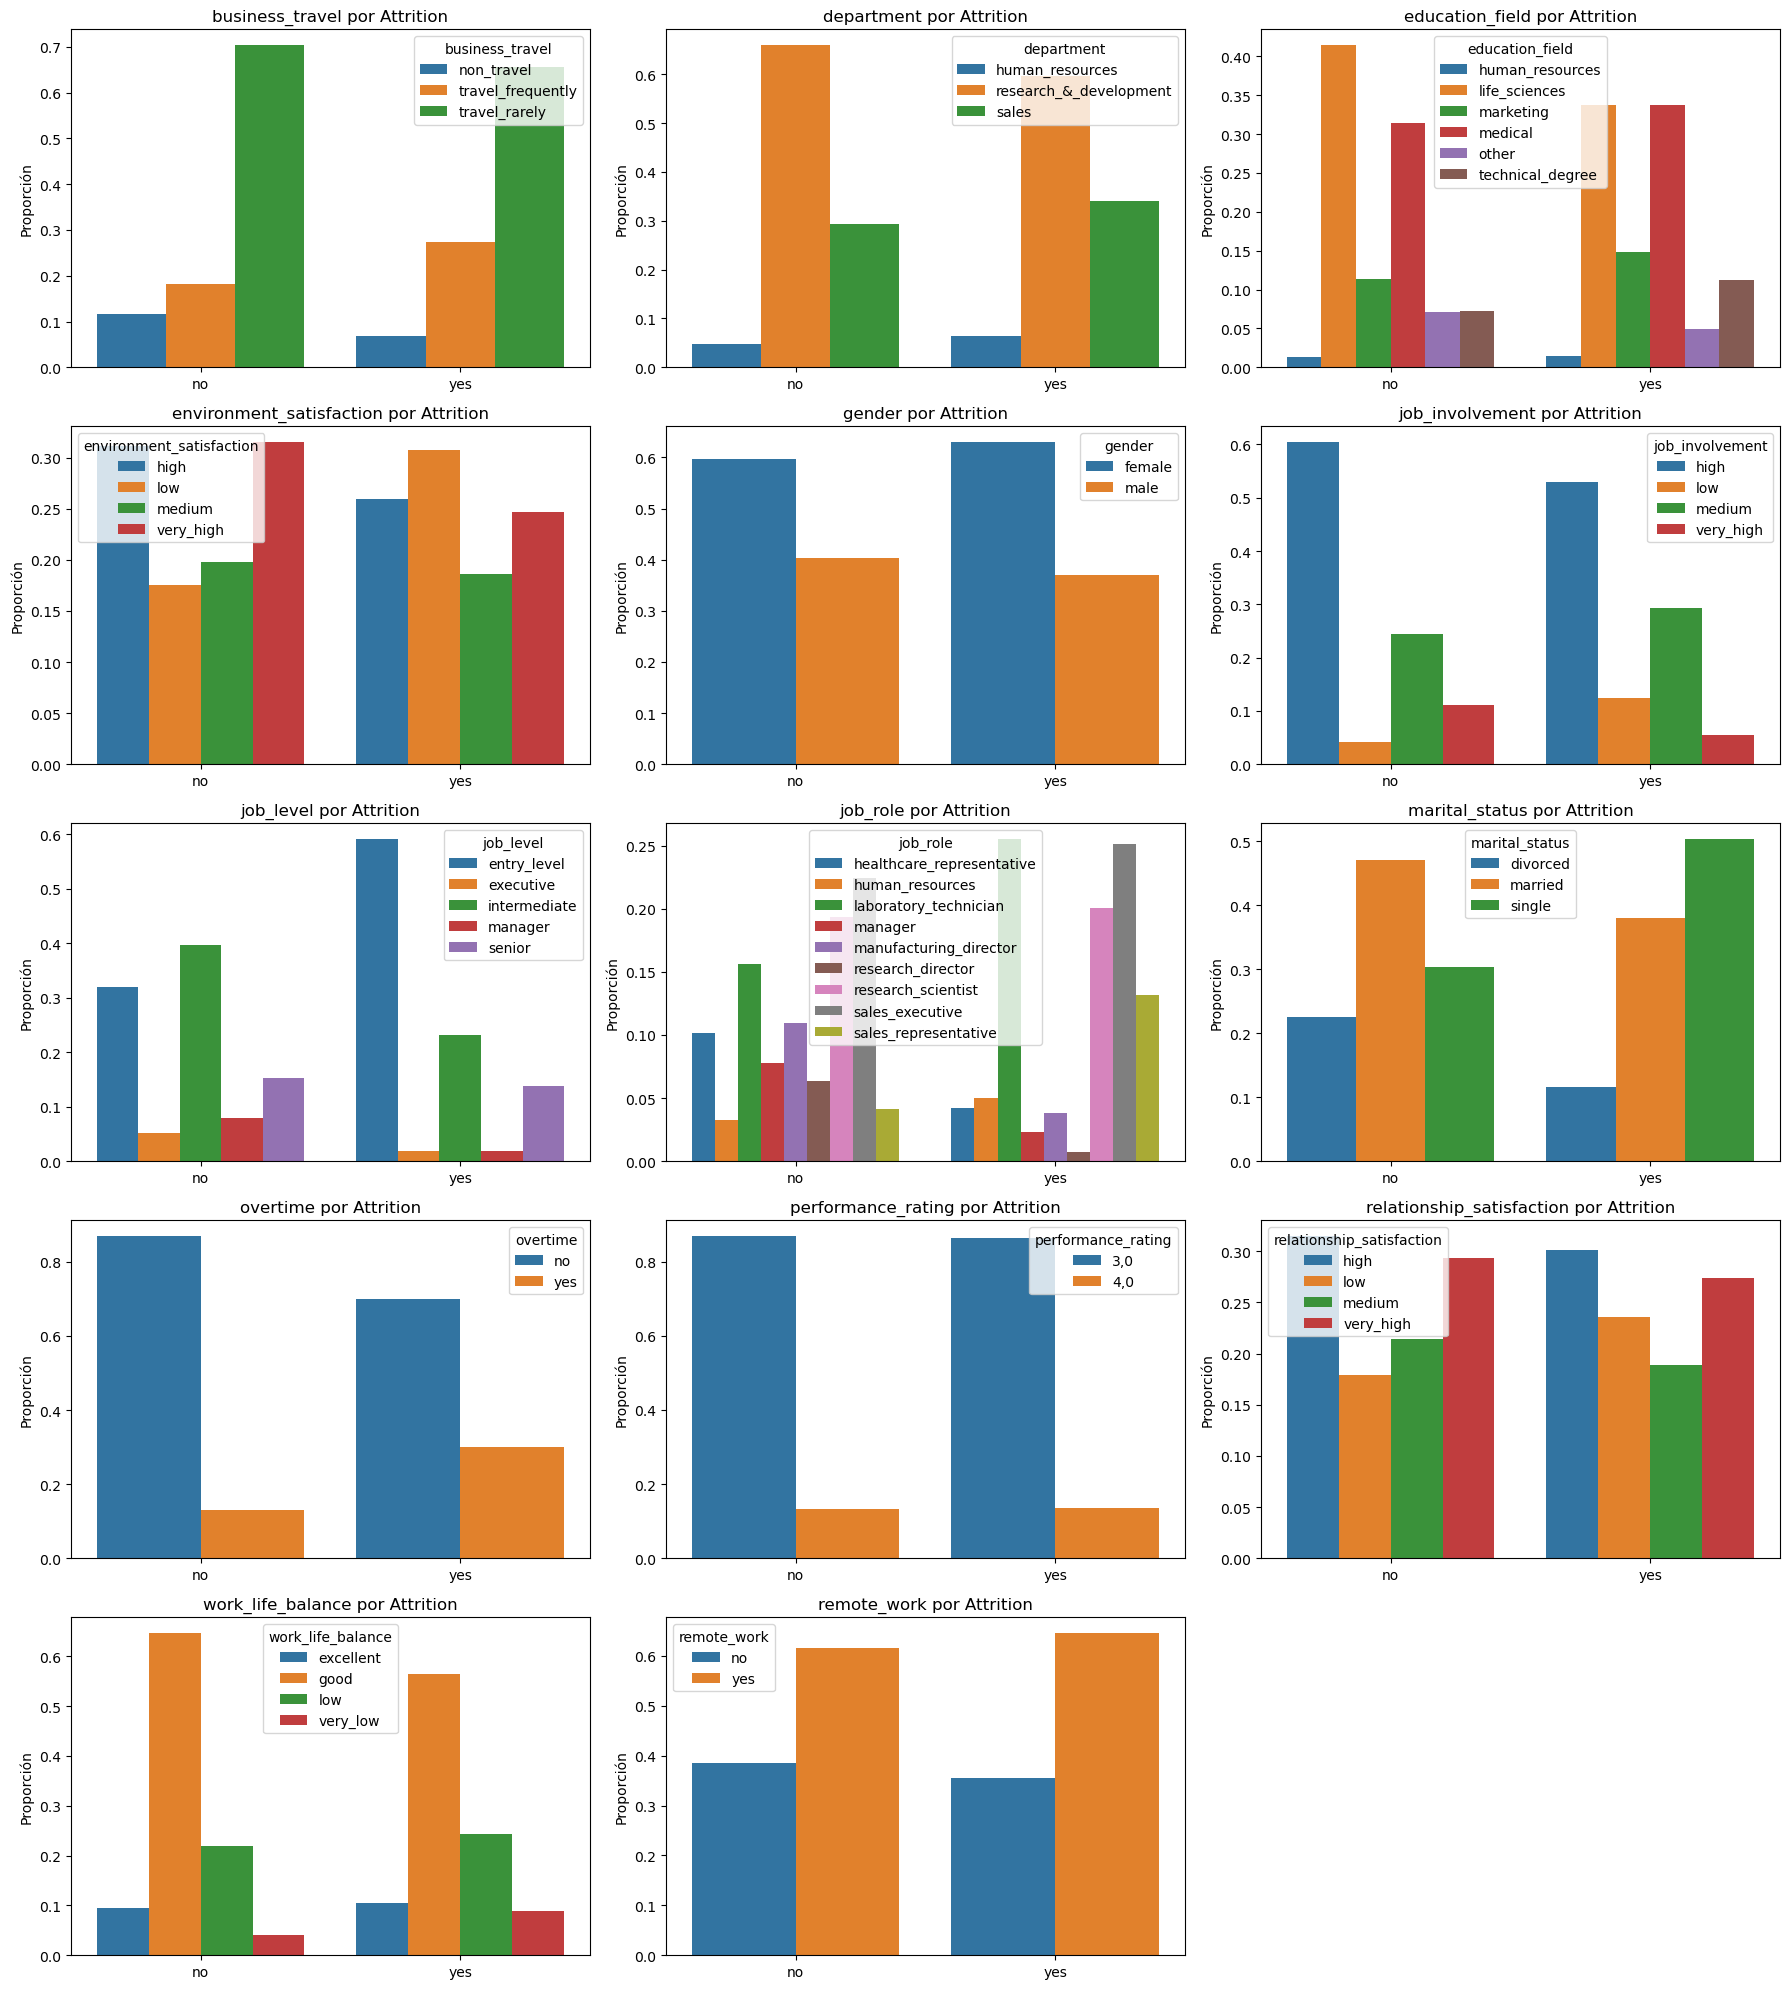

In [31]:
# Lista de columnas a comparar con 'attrition'
cols = [
    'business_travel', 'department', 'education_field',
    'environment_satisfaction', 'gender', 'job_involvement', 'job_level',
    'job_role', 'marital_status', 'overtime', 'performance_rating',
    'relationship_satisfaction', 'work_life_balance', 'remote_work'
]

# Número de gráficos por fila
ncols = 3
nrows = -(-len(cols) // ncols)  # redondeo hacia arriba

# Crear subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4))
axes = axes.flatten()

# Crear visualizaciones
for i, col in enumerate(cols):
    ax = axes[i]
    try:
        if df[col].dtype == 'object' or df[col].nunique() < 10:
            # Categórica: proporciones por attrition
            prop_df = df.groupby(['attrition', col]).size().reset_index(name='count')
            total_per_group = prop_df.groupby('attrition')['count'].transform('sum')
            prop_df['percentage'] = prop_df['count'] / total_per_group

            sns.barplot(data=prop_df, x='attrition', y='percentage', hue=col, ax=ax)
            ax.set_ylabel('Proporción')
            ax.set_title(f'{col} por Attrition')

        else:
            # Numérica: media por attrition
            sns.barplot(data=df, x='attrition', y=col, ax=ax, estimator='mean')
            ax.set_ylabel(f'Media de {col}')
            ax.set_title(f'Media de {col} por Attrition')

        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=0)

    except Exception as e:
        ax.set_visible(False)
        print(f'Error al graficar {col}: {e}')

# Ocultar subplots sobrantes
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

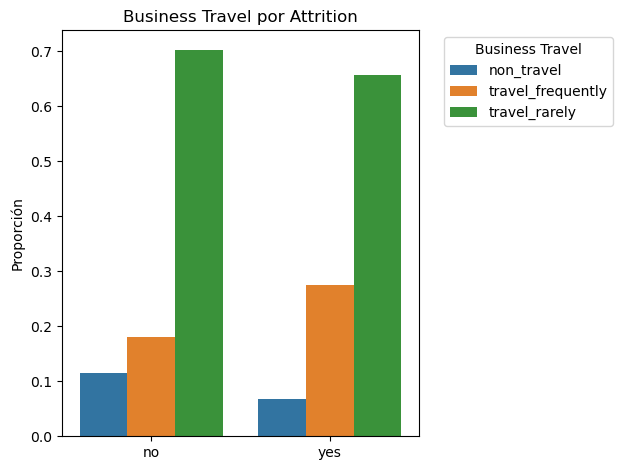

In [32]:
prop_df = df.groupby(['attrition', 'business_travel']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('attrition')['count'].transform('sum')

sns.barplot(data=prop_df, x='attrition', y='percentage', hue='business_travel')
plt.title('Business Travel por Attrition')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Business Travel')
plt.tight_layout()
plt.show()

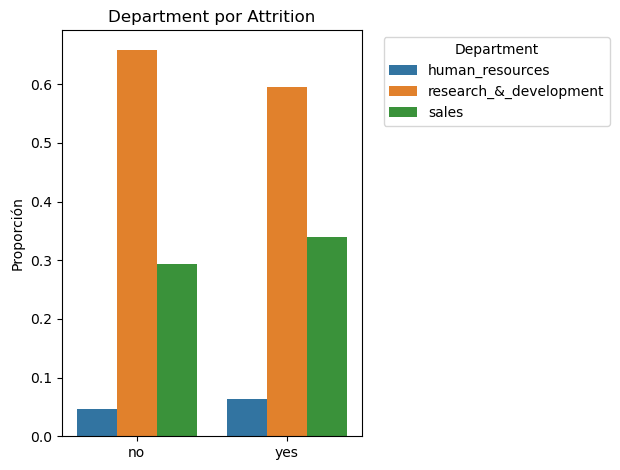

In [33]:
prop_df = df.groupby(['attrition', 'department']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('attrition')['count'].transform('sum')

sns.barplot(data=prop_df, x='attrition', y='percentage', hue='department')
plt.title('Department por Attrition')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Department')
plt.tight_layout()
plt.show()

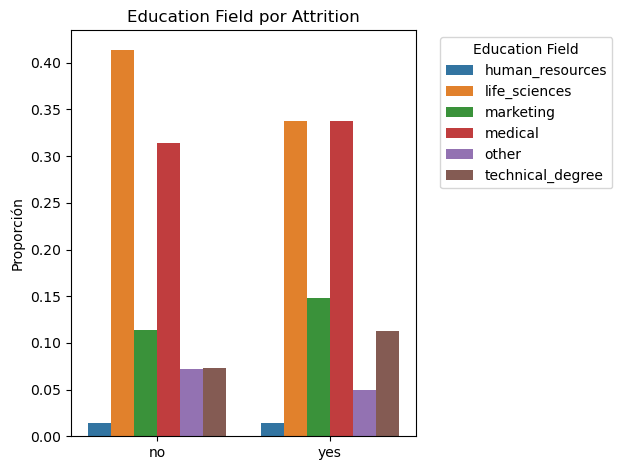

In [34]:
prop_df = df.groupby(['attrition', 'education_field']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('attrition')['count'].transform('sum')

sns.barplot(data=prop_df, x='attrition', y='percentage', hue='education_field')
plt.title('Education Field por Attrition')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Education Field')
plt.tight_layout()
plt.show()

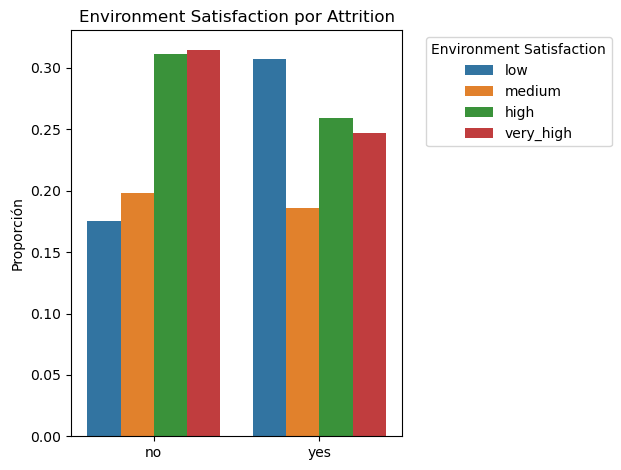

In [35]:
# Definir el orden deseado
orden_entorno = ['low', 'medium', 'high', 'very_high']

prop_df = df.groupby(['attrition', 'environment_satisfaction']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('attrition')['count'].transform('sum')

sns.barplot(
    data=prop_df,
    x='attrition',
    y='percentage',
    hue='environment_satisfaction',
    hue_order=orden_entorno  # <-- orden aplicado aquí
)

plt.title('Environment Satisfaction por Attrition')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Environment Satisfaction')
plt.tight_layout()
plt.show()

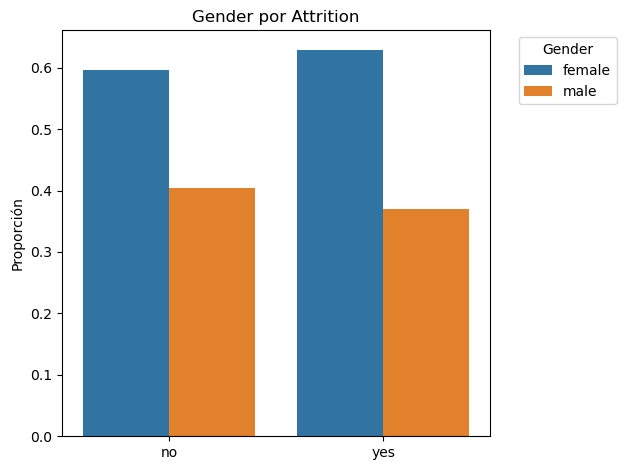

In [36]:
prop_df = df.groupby(['attrition', 'gender']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('attrition')['count'].transform('sum')

sns.barplot(data=prop_df, x='attrition', y='percentage', hue='gender')
plt.title('Gender por Attrition')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Gender')
plt.tight_layout()
plt.show()

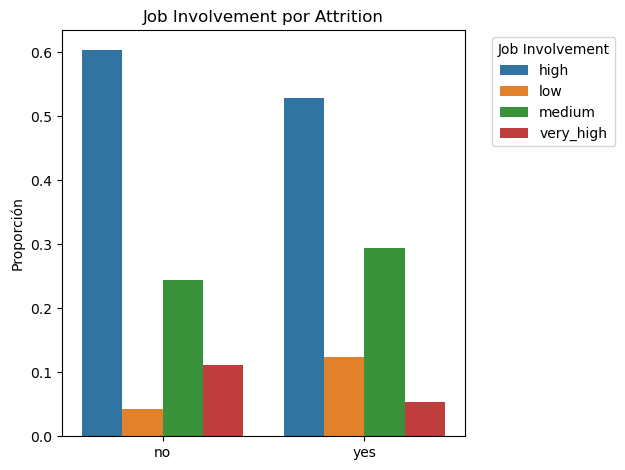

In [37]:
prop_df = df.groupby(['attrition', 'job_involvement']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('attrition')['count'].transform('sum')

sns.barplot(data=prop_df, x='attrition', y='percentage', hue='job_involvement')
plt.title('Job Involvement por Attrition')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Job Involvement')
plt.tight_layout()
plt.show()

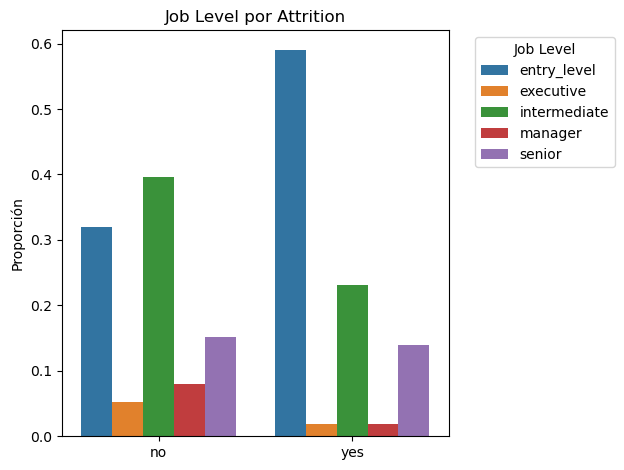

In [38]:
prop_df = df.groupby(['attrition', 'job_level']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('attrition')['count'].transform('sum')

sns.barplot(data=prop_df, x='attrition', y='percentage', hue='job_level')
plt.title('Job Level por Attrition')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Job Level')
plt.tight_layout()
plt.show()

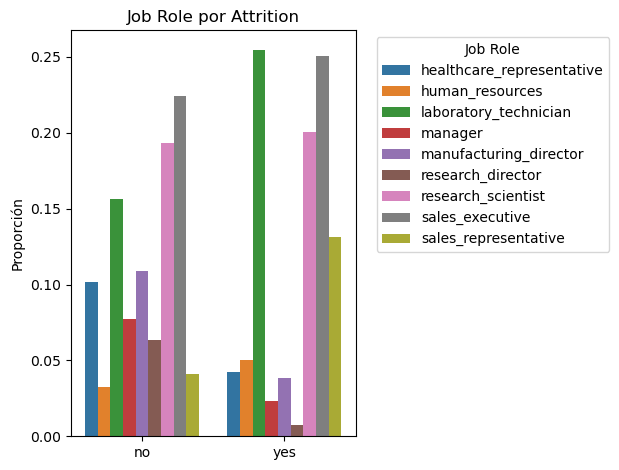

In [39]:
prop_df = df.groupby(['attrition', 'job_role']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('attrition')['count'].transform('sum')

sns.barplot(data=prop_df, x='attrition', y='percentage', hue='job_role')
plt.title('Job Role por Attrition')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Job Role')
plt.tight_layout()
plt.show()

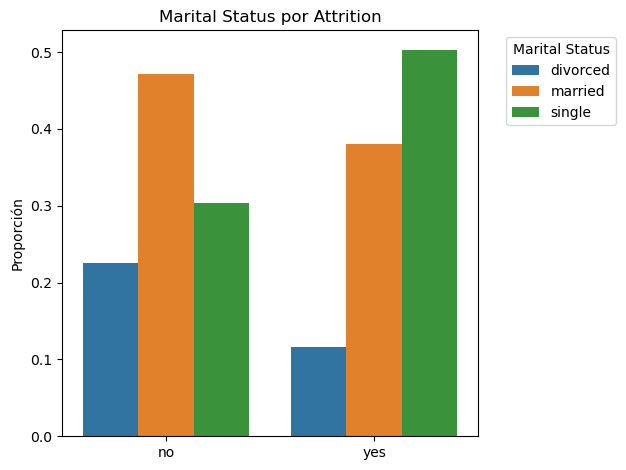

In [40]:
prop_df = df.groupby(['attrition', 'marital_status']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('attrition')['count'].transform('sum')

sns.barplot(data=prop_df, x='attrition', y='percentage', hue='marital_status')
plt.title('Marital Status por Attrition')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Marital Status')
plt.tight_layout()
plt.show()

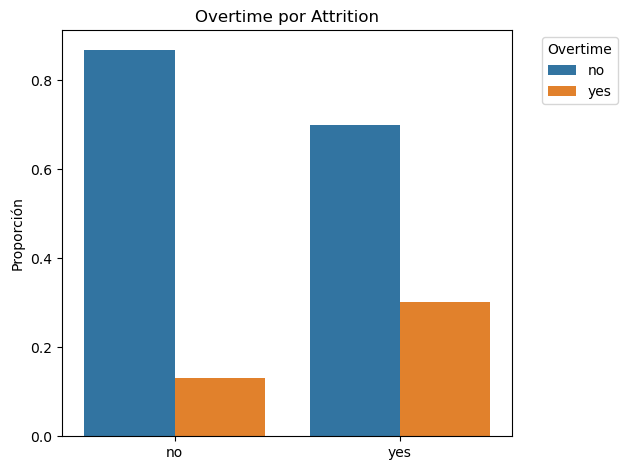

In [41]:
prop_df = df.groupby(['attrition', 'overtime']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('attrition')['count'].transform('sum')

sns.barplot(data=prop_df, x='attrition', y='percentage', hue='overtime')
plt.title('Overtime por Attrition')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Overtime')
plt.tight_layout()
plt.show()

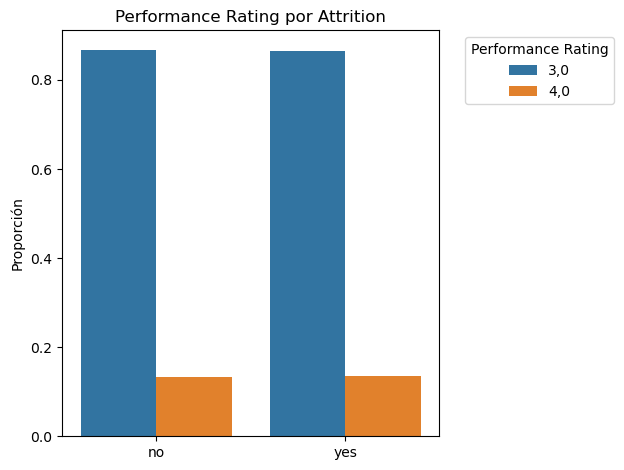

In [42]:
prop_df = df.groupby(['attrition', 'performance_rating']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('attrition')['count'].transform('sum')

sns.barplot(data=prop_df, x='attrition', y='percentage', hue='performance_rating')
plt.title('Performance Rating por Attrition')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Performance Rating')
plt.tight_layout()
plt.show()

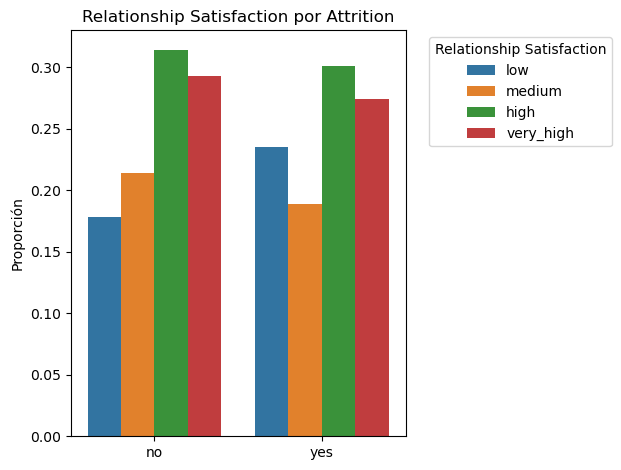

In [43]:
# Definir el orden deseado
orden_relacion = ['low', 'medium', 'high', 'very_high']

prop_df = df.groupby(['attrition', 'relationship_satisfaction']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('attrition')['count'].transform('sum')

sns.barplot(
    data=prop_df,
    x='attrition',
    y='percentage',
    hue='relationship_satisfaction',
    hue_order=orden_relacion  # <--- Se especifica el orden aquí
)

plt.title('Relationship Satisfaction por Attrition')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Relationship Satisfaction')
plt.tight_layout()
plt.show()

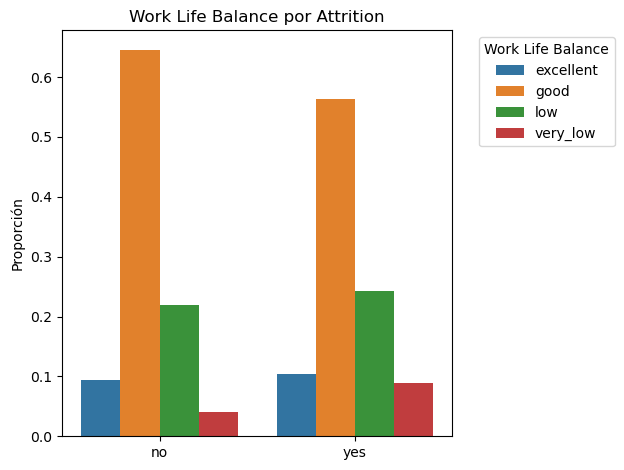

In [44]:
prop_df = df.groupby(['attrition', 'work_life_balance']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('attrition')['count'].transform('sum')

sns.barplot(data=prop_df, x='attrition', y='percentage', hue='work_life_balance')
plt.title('Work Life Balance por Attrition')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Work Life Balance')
plt.tight_layout()
plt.show()

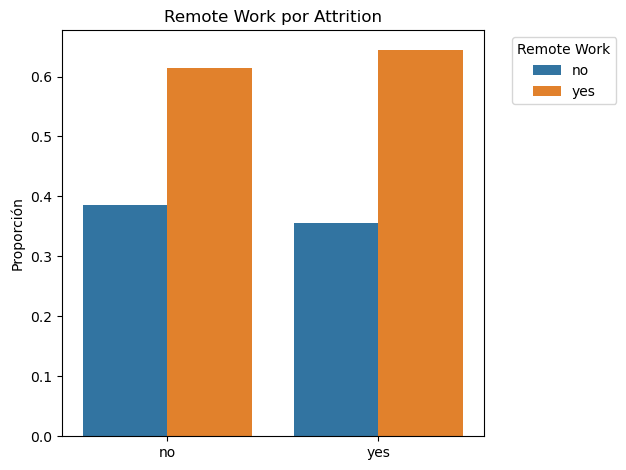

In [46]:
prop_df = df.groupby(['attrition', 'remote_work']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('attrition')['count'].transform('sum')

sns.barplot(data=prop_df, x='attrition', y='percentage', hue='remote_work')
plt.title('Remote Work por Attrition')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Remote Work')
plt.tight_layout()
plt.show()

## Cambios in the nick of time

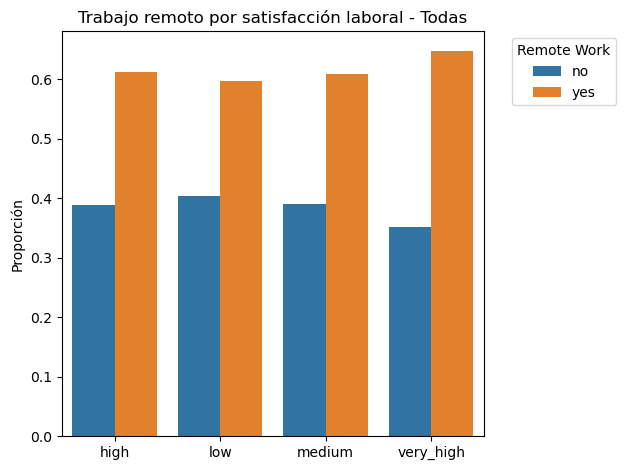

In [88]:
df = pd.read_csv("df_final.csv")

prop_df = df.groupby(['job_satisfaction', 'remote_work']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='remote_work')
plt.title('Trabajo remoto por satisfacción laboral - Todas')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Remote Work')
plt.tight_layout()
plt.show()

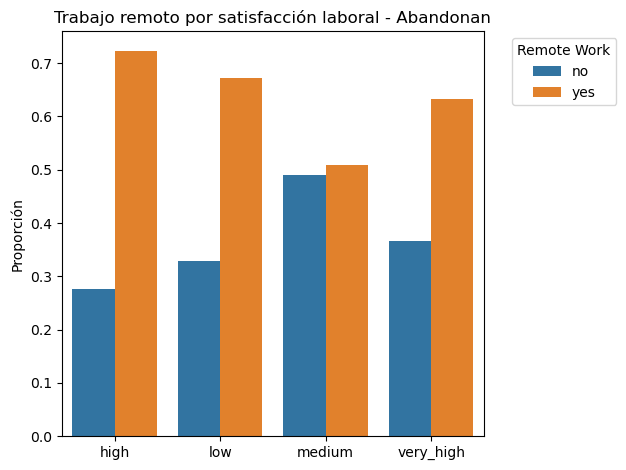

In [89]:
df = pd.read_csv("df_final.csv")
df = df[df['attrition'] == 'yes']

prop_df = df.groupby(['job_satisfaction', 'remote_work']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='remote_work')
plt.title('Trabajo remoto por satisfacción laboral - Abandonan')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Remote Work')
plt.tight_layout()
plt.show()

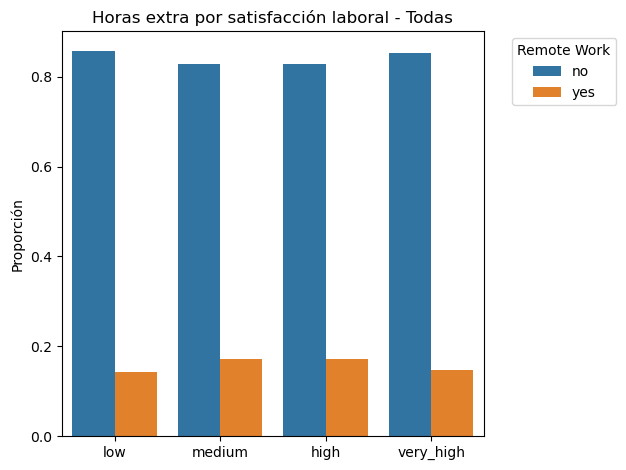

In [71]:
df = pd.read_csv("df_final.csv")

# Orden especifico
job_satisfaction_order = ['low', 'medium', 'high', 'very_high']

# Satisfacción laboral a categorica
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=job_satisfaction_order, ordered=True)

prop_df = df.groupby(['job_satisfaction', 'overtime']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='overtime')
plt.title('Horas extra por satisfacción laboral - Todas')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Remote Work')
plt.tight_layout()
plt.show()

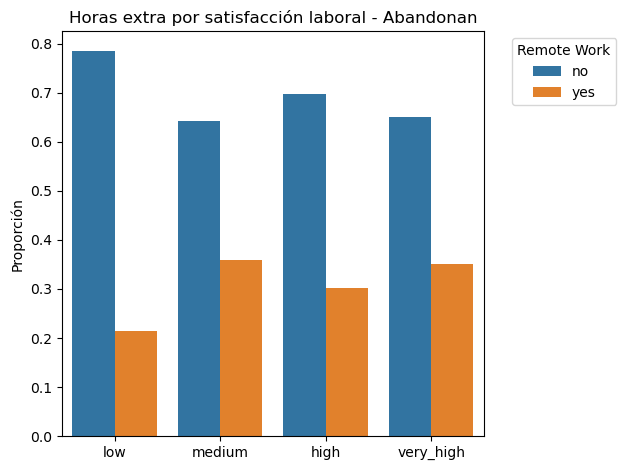

In [ ]:
df = df[df['attrition'] == 'yes']

# Orden especifico
job_satisfaction_order = ['low', 'medium', 'high', 'very_high']

# Satisfacción laboral a categorica
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=job_satisfaction_order, ordered=True)

prop_df = df.groupby(['job_satisfaction', 'overtime']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='overtime')
plt.title('Horas extra por satisfacción laboral - Abandonan')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Remote Work')
plt.tight_layout()
plt.show()

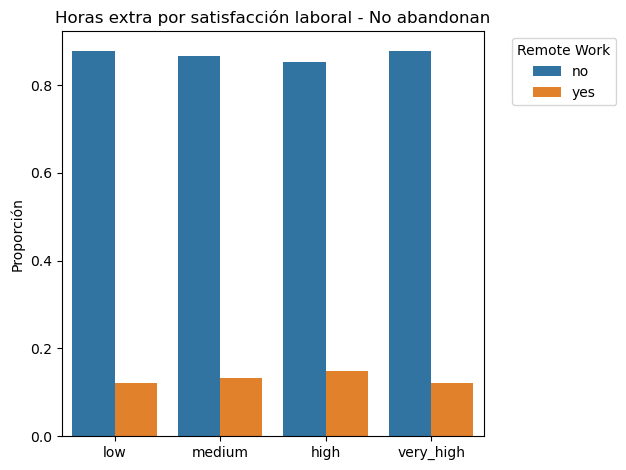

In [73]:
df = df[df['attrition'] == 'no']

# Orden especifico
job_satisfaction_order = ['low', 'medium', 'high', 'very_high']

# Satisfacción laboral a categorica
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=job_satisfaction_order, ordered=True)

prop_df = df.groupby(['job_satisfaction', 'overtime']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='overtime')
plt.title('Horas extra por satisfacción laboral - No abandonan')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Remote Work')
plt.tight_layout()
plt.show()

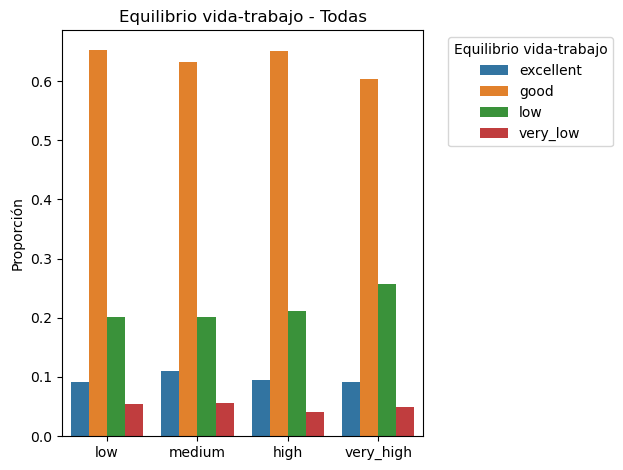

In [81]:
df = pd.read_csv("df_final.csv")

# Orden especifico
job_satisfaction_order = ['low', 'medium', 'high', 'very_high']

# Satisfacción laboral a categorica
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=job_satisfaction_order, ordered=True)

prop_df = df.groupby(['job_satisfaction', 'work_life_balance']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='work_life_balance')
plt.title('Equilibrio vida-trabajo - Todas')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Equilibrio vida-trabajo')
plt.tight_layout()
plt.show()

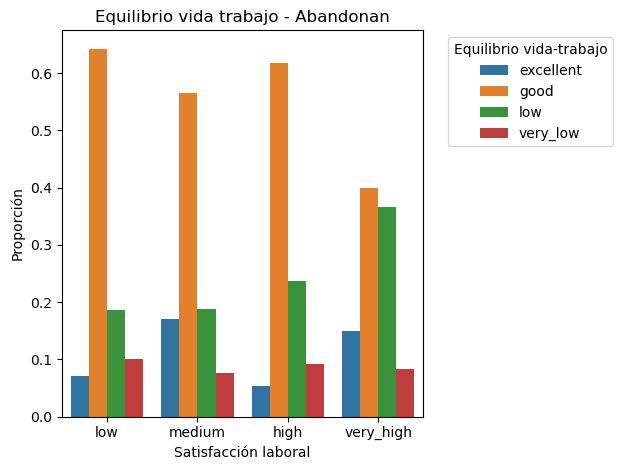

In [80]:
df = pd.read_csv("df_final.csv")
df = df[df['attrition'] == 'yes']

# Orden especifico
job_satisfaction_order = ['low', 'medium', 'high', 'very_high']

# Satisfacción laboral a categorica
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=job_satisfaction_order, ordered=True)

prop_df = df.groupby(['job_satisfaction', 'work_life_balance']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='work_life_balance')
plt.title('Equilibrio vida trabajo - Abandonan')
plt.ylabel('Proporción')
plt.xlabel('Satisfacción laboral')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Equilibrio vida-trabajo')
plt.tight_layout()
plt.show()

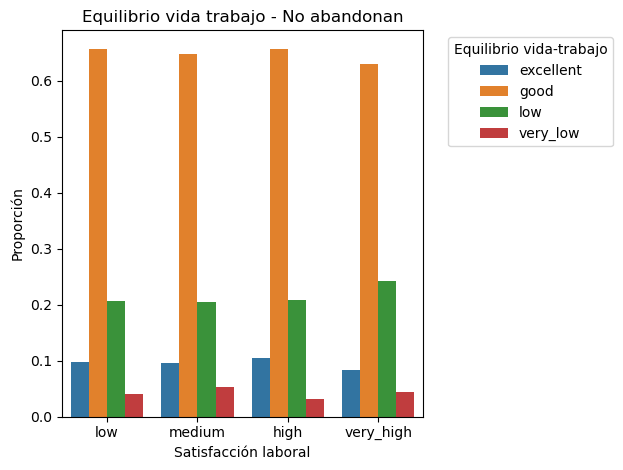

In [82]:
df = pd.read_csv("df_final.csv")
df = df[df['attrition'] == 'no']

# Orden especifico
job_satisfaction_order = ['low', 'medium', 'high', 'very_high']

# Satisfacción laboral a categorica
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=job_satisfaction_order, ordered=True)

prop_df = df.groupby(['job_satisfaction', 'work_life_balance']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='work_life_balance')
plt.title('Equilibrio vida trabajo - No abandonan')
plt.ylabel('Proporción')
plt.xlabel('Satisfacción laboral')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Equilibrio vida-trabajo')
plt.tight_layout()
plt.show()

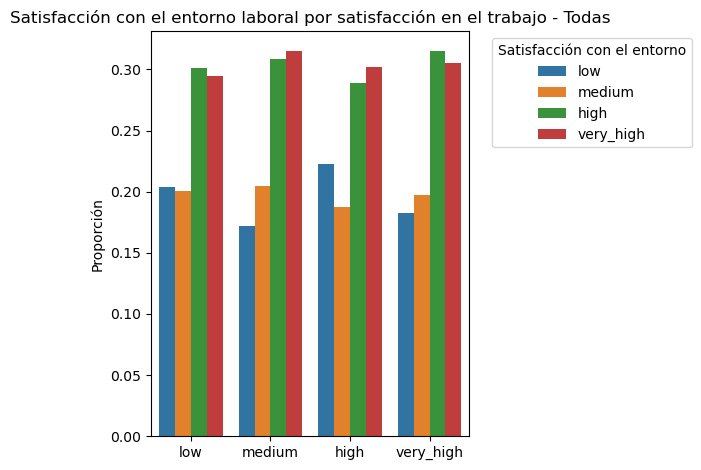

In [85]:
df = pd.read_csv("df_final.csv")

satisfaction_order = ['low', 'medium', 'high', 'very_high']

df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=satisfaction_order, ordered=True)
df['environment_satisfaction'] = pd.Categorical(df['environment_satisfaction'], categories=satisfaction_order, ordered=True)

prop_df = df.groupby(['job_satisfaction', 'environment_satisfaction']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='environment_satisfaction')
plt.title('Satisfacción con el entorno laboral por satisfacción en el trabajo - Todas')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Satisfacción con el entorno')
plt.tight_layout()
plt.show()


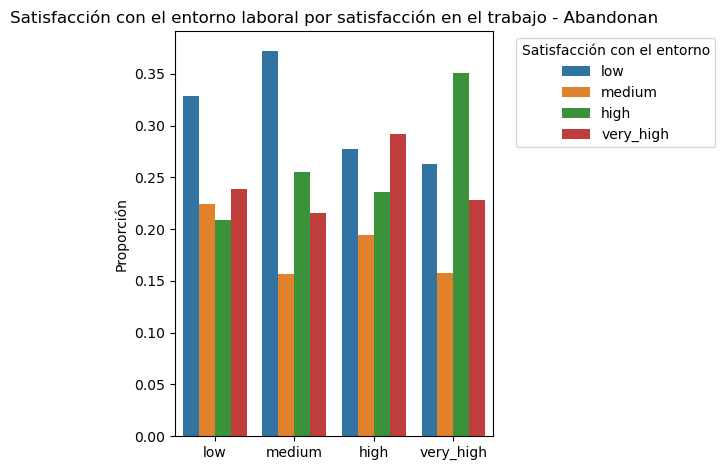

In [86]:
df = pd.read_csv("df_final.csv")
df = df[df['attrition'] == 'yes']

satisfaction_order = ['low', 'medium', 'high', 'very_high']

df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=satisfaction_order, ordered=True)
df['environment_satisfaction'] = pd.Categorical(df['environment_satisfaction'], categories=satisfaction_order, ordered=True)

prop_df = df.groupby(['job_satisfaction', 'environment_satisfaction']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_satisfaction')['count'].transform('sum')

sns.barplot(data=prop_df, x='job_satisfaction', y='percentage', hue='environment_satisfaction')
plt.title('Satisfacción con el entorno laboral por satisfacción en el trabajo - Abandonan')
plt.ylabel('Proporción')
plt.xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Satisfacción con el entorno')
plt.tight_layout()
plt.show()

## Regression

In [90]:
df = pd.read_csv("df_final.csv")

In [100]:
df.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'overtime',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'standard_hours', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_since_last_promotion',
       'years_with_curr_manager', 'date_birth', 'salary', 'remote_work',
       'iter_hourly_rate', 'iter_total_working_years', 'iter_monthly_income',
       'iter_salary', 'knn_hourly_rate', 'knn_total_working_years',
       'knn_monthly_income', 'knn_salary', 'attrition_bin'],
      dtype='object')

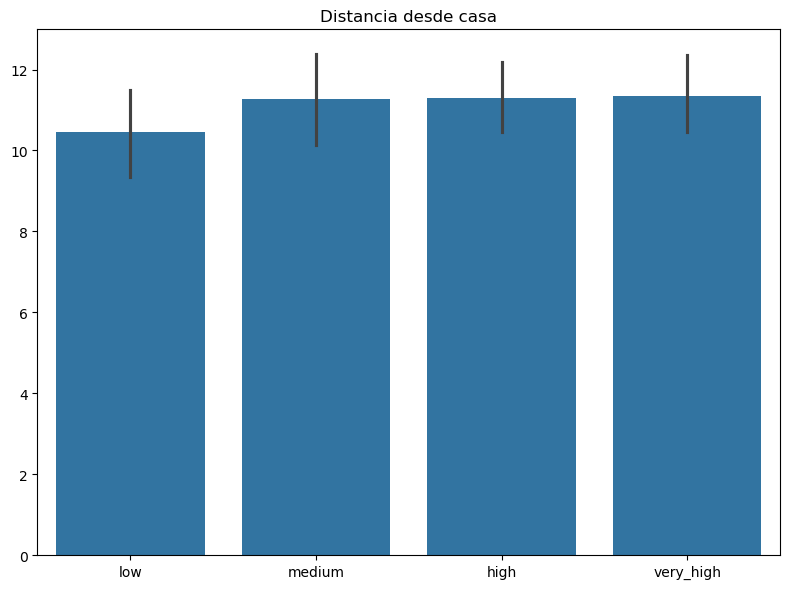

In [124]:
df = pd.read_csv("df_final.csv")

# Cobversion a categorica con orden especifico
job_satisfaction_order = ['low', 'medium', 'high', 'very_high']
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=job_satisfaction_order, ordered=True)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(ax=ax, data=df, x='job_satisfaction', y='distance_from_home')
ax.set_title('Distancia desde casa')
ax.set_xlabel('')
ax.set_ylabel('')

# General adjustments
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()


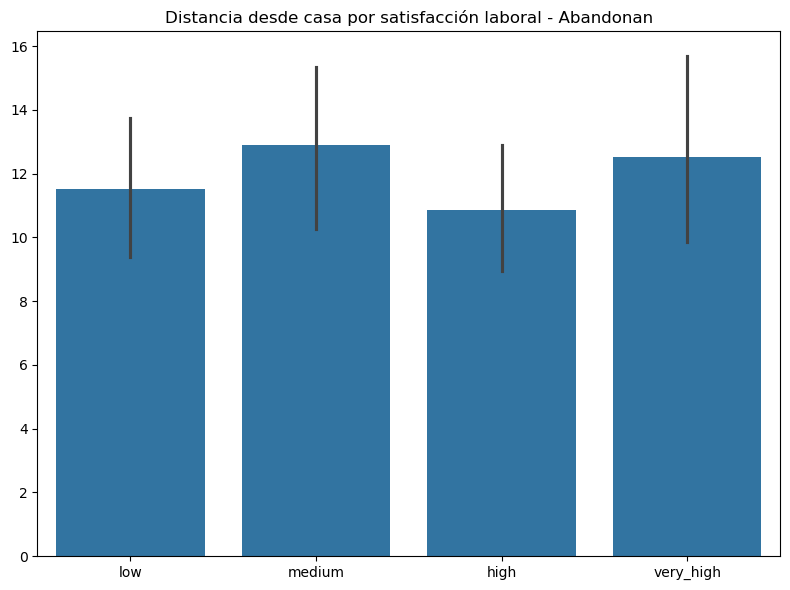

In [113]:
df = pd.read_csv("df_final.csv")
df = df[df['attrition'] == 'yes']

# Cobversion a categorica con orden especifico
job_satisfaction_order = ['low', 'medium', 'high', 'very_high']
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=job_satisfaction_order, ordered=True)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(ax=ax, data=df, x='job_satisfaction', y='distance_from_home')
ax.set_title('Distancia desde casa por satisfacción laboral - Abandonan')
ax.set_xlabel('')
ax.set_ylabel('')

# General adjustments
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

In [118]:

import pandas as pd
from scipy import stats


In [160]:
df = pd.read_csv("df_final.csv")
#df = df[df['attrition'] == 'yes']

# Separate the data into two groups based on attrition
group_yes = df[df['attrition'] == 'yes']['distance_from_home']
group_no = df[df['attrition'] == 'no']['distance_from_home']

# Perform Mann-Whitney U test to compare the distributions of the two groups
u_stat, p_value = mannwhitneyu(group_yes, group_no)

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the means of 'distance_from_home' between the two groups (attrition: yes vs no).")
else:
    print("There is no significant difference in the means of 'distance_from_home' between the two groups (attrition: yes vs no).")

U-statistic: 189260.5
P-value: 0.044262816508059376
There is a significant difference in the means of 'distance_from_home' between the two groups (attrition: yes vs no).


In [161]:
df = pd.read_csv("df_final.csv")
#df = df[df['attrition'] == 'yes']

# Separate the data into two groups based on attrition
group_yes = df[df['attrition'] == 'yes']['education']
group_no = df[df['attrition'] == 'no']['education']

# Perform Mann-Whitney U test to compare the distributions of the two groups
u_stat, p_value = mannwhitneyu(group_yes, group_no)

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the means of 'education' between the two groups (attrition: yes vs no).")
else:
    print("There is no significant difference in the means of 'education' between the two groups (attrition: yes vs no).")


U-statistic: 168183.0
P-value: 0.26708223794256847
There is no significant difference in the means of 'education' between the two groups (attrition: yes vs no).


In [176]:
df = pd.read_csv("df_final.csv")
#df = df[df['attrition'] == 'yes']

# Separate the data into two groups based on attrition
group_yes = df[df['attrition'] == 'yes']['iter_monthly_income']
group_no = df[df['attrition'] == 'no']['iter_monthly_income']

# Perform Mann-Whitney U test to compare the distributions of the two groups
u_stat, p_value = mannwhitneyu(group_yes, group_no)

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the means of 'knn_monthly_income' between the two groups (attrition: yes vs no).")
else:
    print("There is no significant difference in the means of 'knn_monthly_income' between the two groups (attrition: yes vs no).")


U-statistic: 148998.5
P-value: 9.19944589142649e-05
There is a significant difference in the means of 'knn_monthly_income' between the two groups (attrition: yes vs no).


In [156]:

import pandas as pd
from scipy.stats import mannwhitneyu


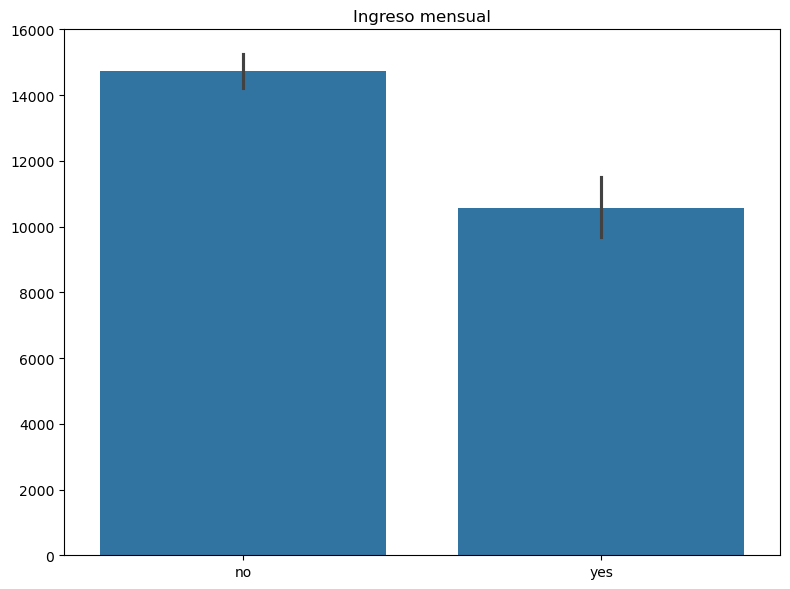

In [165]:
df = pd.read_csv("df_final.csv")

# Conversion a categorica con orden especifico
attrition_order = ['no', 'yes']
df['attrition'] = pd.Categorical(df['attrition'], categories=attrition_order, ordered=True)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(ax=ax, data=df, x='attrition', y='monthly_rate')
ax.set_title('Ingreso mensual')
ax.set_xlabel('')
ax.set_ylabel('')

# General adjustments
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [179]:
df = pd.read_csv("df_final.csv")
df = df[df['attrition'] == 'yes']

# Convert job_satisfaction to category dtype with specific order
job_satisfaction_order = ['low', 'medium', 'high', 'very_high']
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=job_satisfaction_order, ordered=True)

# Perform ANOVA test
anova_model = ols('iter_salary ~ C(job_satisfaction)', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

print("ANOVA Table:")
print(anova_table)

# Interpret the results
alpha = 0.05
if anova_table['PR(>F)'][0] < alpha:
    print("There is a significant difference in the means of 'monthly_rate' across the levels of 'job_satisfaction'.")
else:
    print("There is no significant difference in the means of 'monthly_rate' across the levels of 'job_satisfaction'.")



ANOVA Table:
                           sum_sq     df         F    PR(>F)
C(job_satisfaction)  2.949631e+09    3.0  0.913909  0.434745
Residual             2.743366e+11  255.0       NaN       NaN
There is no significant difference in the means of 'monthly_rate' across the levels of 'job_satisfaction'.


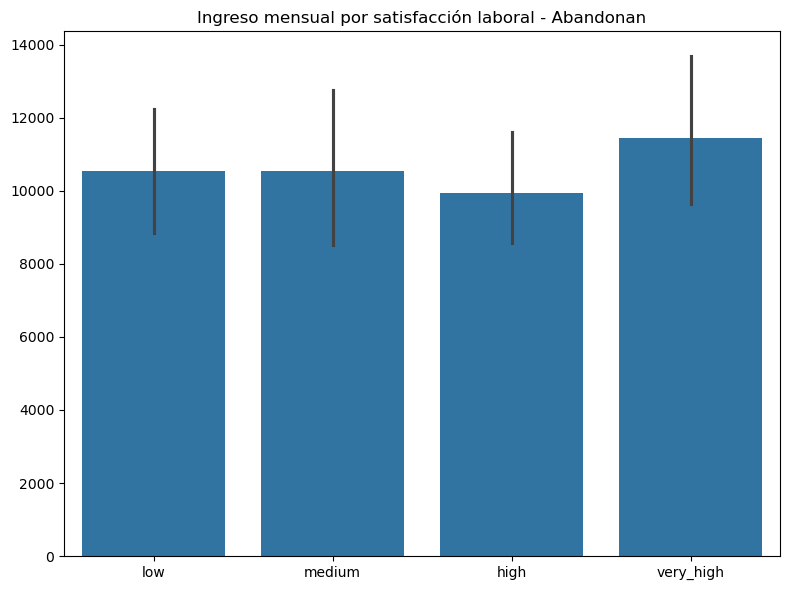

In [167]:
df = pd.read_csv("df_final.csv")
df = df[df['attrition'] == 'yes']

# Cobversion a categorica con orden especifico
job_satisfaction_order = ['low', 'medium', 'high', 'very_high']
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=job_satisfaction_order, ordered=True)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(ax=ax, data=df, x='job_satisfaction', y='monthly_rate')
ax.set_title('Ingreso mensual por satisfacción laboral - Abandonan')
ax.set_xlabel('')
ax.set_ylabel('')

# General adjustments
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

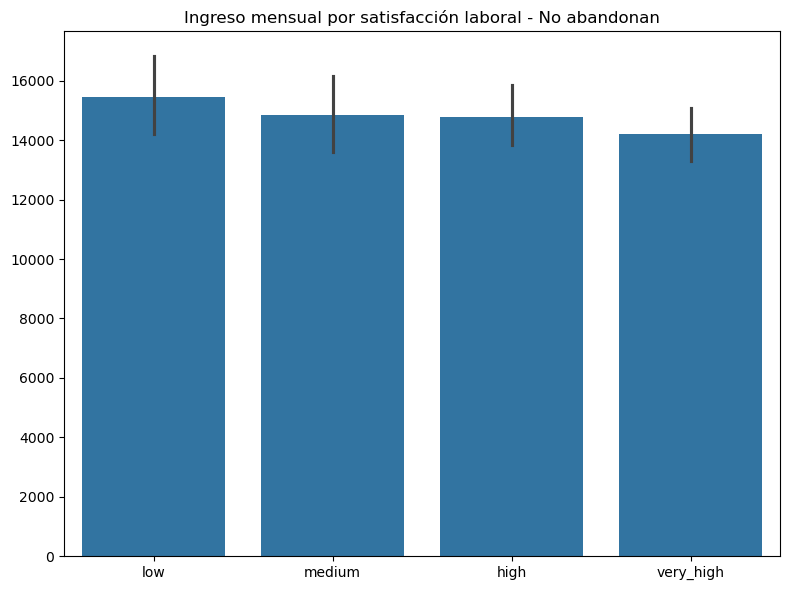

In [168]:
df = pd.read_csv("df_final.csv")
df = df[df['attrition'] == 'no']

# Cobversion a categorica con orden especifico
job_satisfaction_order = ['low', 'medium', 'high', 'very_high']
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=job_satisfaction_order, ordered=True)

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(ax=ax, data=df, x='job_satisfaction', y='monthly_rate')
ax.set_title('Ingreso mensual por satisfacción laboral - No abandonan')
ax.set_xlabel('')
ax.set_ylabel('')

# General adjustments
ax.tick_params(axis='x', rotation=0)
plt.tight_layout()
plt.show()

In [116]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [117]:
df = pd.read_csv("df_final.csv")
df['attrition_bin'] = df['attrition'].map({'yes': 1, 'no': 0})
orden = ['low', 'medium', 'high', 'very_high']

tukey = pairwise_tukeyhsd(
    endog=df['attrition_bin'],            
    groups=df['job_satisfaction'],        
    alpha=0.05                            
)

print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  high       low   0.0628 0.0824 -0.0052  0.1308  False
  high    medium   0.0175  0.915 -0.0515  0.0865  False
  high very_high  -0.0413 0.2836 -0.1009  0.0184  False
   low    medium  -0.0453 0.4128 -0.1209  0.0303  False
   low very_high  -0.1041 0.0004 -0.1712 -0.0369   True
medium very_high  -0.0588 0.1191 -0.1269  0.0094  False
-------------------------------------------------------


In [143]:
df.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'overtime',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'standard_hours', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_since_last_promotion',
       'years_with_curr_manager', 'date_birth', 'salary', 'remote_work',
       'iter_hourly_rate', 'iter_total_working_years', 'iter_monthly_income',
       'iter_salary', 'knn_hourly_rate', 'knn_total_working_years',
       'knn_monthly_income', 'knn_salary'],
      dtype='object')

In [180]:
df = pd.read_csv("df_final.csv")
#df = df[df['attrition'] == 'yes']

# Separate the data into two groups based on attrition
group_yes = df[df['attrition'] == 'yes']['percent_salary_hike']
group_no = df[df['attrition'] == 'no']['percent_salary_hike']

# Perform Mann-Whitney U test to compare the distributions of the two groups
u_stat, p_value = mannwhitneyu(group_yes, group_no)

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the means of 'percent_salary_hike' between the two groups (attrition: yes vs no).")
else:
    print("There is no significant difference in the means of 'percent_salary_hike' between the two groups (attrition: yes vs no).")


U-statistic: 168037.0
P-value: 0.2763632536457179
There is no significant difference in the means of 'percent_salary_hike' between the two groups (attrition: yes vs no).


In [181]:
df = pd.read_csv("df_final.csv")
#df = df[df['attrition'] == 'yes']

# Separate the data into two groups based on attrition
group_yes = df[df['attrition'] == 'yes']['stock_option_level']
group_no = df[df['attrition'] == 'no']['stock_option_level']

# Perform Mann-Whitney U test to compare the distributions of the two groups
u_stat, p_value = mannwhitneyu(group_yes, group_no)

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the means of 'stock_option_level' between the two groups (attrition: yes vs no).")
else:
    print("There is no significant difference in the means of 'stock_option_level' between the two groups (attrition: yes vs no).")

U-statistic: 132837.0
P-value: 1.76866444189684e-11
There is a significant difference in the means of 'stock_option_level' between the two groups (attrition: yes vs no).


In [182]:
df = pd.read_csv("df_final.csv")
#df = df[df['attrition'] == 'yes']

# Separate the data into two groups based on attrition
group_yes = df[df['attrition'] == 'yes']['training_times_last_year']
group_no = df[df['attrition'] == 'no']['training_times_last_year']

# Perform Mann-Whitney U test to compare the distributions of the two groups
u_stat, p_value = mannwhitneyu(group_yes, group_no)

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in the means of 'training_times_last_year' between the two groups (attrition: yes vs no).")
else:
    print("There is no significant difference in the means of 'training_times_last_year' between the two groups (attrition: yes vs no).")


U-statistic: 163746.0
P-value: 0.07391042165291532
There is no significant difference in the means of 'training_times_last_year' between the two groups (attrition: yes vs no).


In [94]:
import seaborn as sns

In [130]:
df = pd.read_csv("df_final.csv")
df['attrition_bin'] = df['attrition'].map({'yes': 1, 'no': 0})
orden = ['low', 'medium', 'high', 'very_high']

tukey = pairwise_tukeyhsd(
    endog=df['attrition_bin'],            
    groups=df['job_satisfaction'],        
    alpha=0.05                            
)

print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  high       low   0.0628 0.0824 -0.0052  0.1308  False
  high    medium   0.0175  0.915 -0.0515  0.0865  False
  high very_high  -0.0413 0.2836 -0.1009  0.0184  False
   low    medium  -0.0453 0.4128 -0.1209  0.0303  False
   low very_high  -0.1041 0.0004 -0.1712 -0.0369   True
medium very_high  -0.0588 0.1191 -0.1269  0.0094  False
-------------------------------------------------------


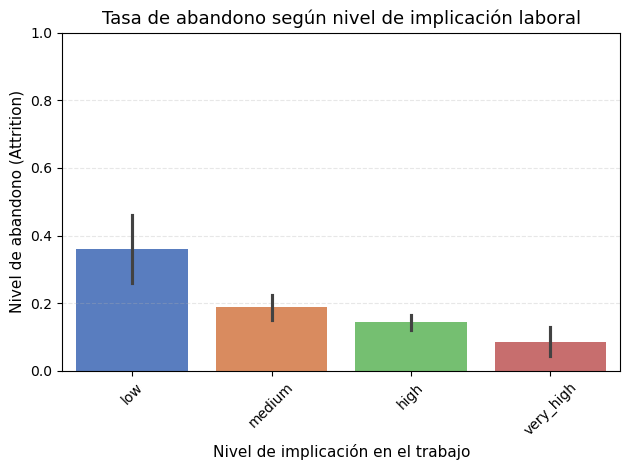

In [ ]:
df = pd.read_csv("df_final.csv")
df['attrition_bin'] = df['attrition'].map({'yes': 1, 'no': 0})
orden = ['low', 'medium', 'high', 'very_high']

sns.barplot(
    x='job_involvement',
    y='attrition_bin',
    data=df,
    palette='muted',
    order=orden 
)

plt.title("Tasa de abandono según nivel de implicación laboral", fontsize=13)
plt.xlabel("Nivel de implicación en el trabajo", fontsize=11)
plt.ylabel("Nivel de abandono", fontsize=11)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [147]:
df.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'overtime',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'standard_hours', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_since_last_promotion',
       'years_with_curr_manager', 'date_birth', 'salary', 'remote_work',
       'iter_hourly_rate', 'iter_total_working_years', 'iter_monthly_income',
       'iter_salary', 'knn_hourly_rate', 'knn_total_working_years',
       'knn_monthly_income', 'knn_salary'],
      dtype='object')

In [212]:
df = pd.read_csv("df_final.csv")
df['attrition_bin'] = df['attrition'].map({'yes': 1, 'no': 0})
orden = ['low', 'medium', 'high', 'very_high']

tukey = pairwise_tukeyhsd(
    endog=df['attrition_bin'],            
    groups=df['job_involvement'],        
    alpha=0.05                            
)

print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  high       low   0.2161    0.0  0.1126  0.3196   True
  high    medium   0.0437 0.1765 -0.0116  0.0991  False
  high very_high  -0.0581 0.2318  -0.137  0.0209  False
   low    medium  -0.1724 0.0003 -0.2817  -0.063   True
   low very_high  -0.2742    0.0 -0.3972 -0.1512   True
medium very_high  -0.1018 0.0133 -0.1883 -0.0154   True
-------------------------------------------------------


## SLIDE 5

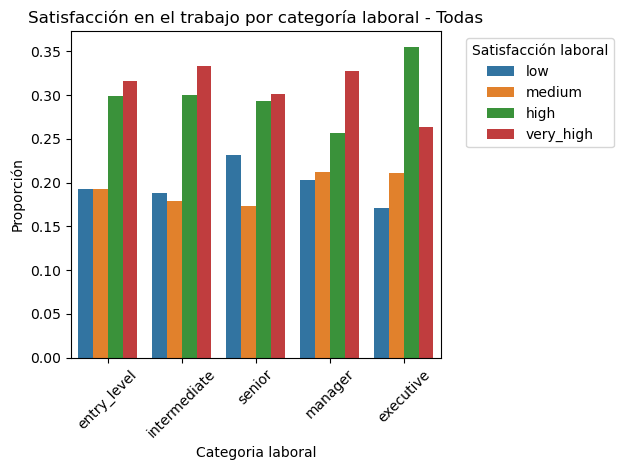

In [198]:
df = pd.read_csv("df_final.csv")

# Orden específico
satisfaction_order = ['low', 'medium', 'high', 'very_high']
job_level_order = ['entry_level', 'intermediate', 'senior', 'manager', 'executive']

# Convertir a categóricas ordenadas
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=satisfaction_order, ordered=True)
df['job_level'] = pd.Categorical(df['job_level'], categories=job_level_order, ordered=True)

# Agrupar y calcular proporciones
prop_df = df.groupby(['job_level', 'job_satisfaction']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_level')['count'].transform('sum')

# Gráfico
sns.barplot(data=prop_df, x='job_level', y='percentage', hue='job_satisfaction')
plt.title('Satisfacción en el trabajo por categoría laboral - Todas')
plt.ylabel('Proporción')
plt.xlabel('Categoria laboral')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Satisfacción laboral')
plt.tight_layout()
plt.show()


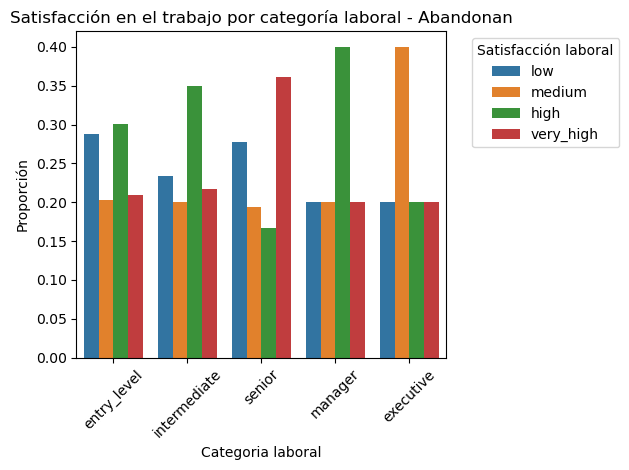

In [199]:
df = pd.read_csv("df_final.csv")
df = df[df['attrition'] == 'yes']

# Orden específico
satisfaction_order = ['low', 'medium', 'high', 'very_high']
job_level_order = ['entry_level', 'intermediate', 'senior', 'manager', 'executive']

# Convertir a categóricas ordenadas
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=satisfaction_order, ordered=True)
df['job_level'] = pd.Categorical(df['job_level'], categories=job_level_order, ordered=True)

# Agrupar y calcular proporciones
prop_df = df.groupby(['job_level', 'job_satisfaction']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_level')['count'].transform('sum')

# Gráfico
sns.barplot(data=prop_df, x='job_level', y='percentage', hue='job_satisfaction')
plt.title('Satisfacción en el trabajo por categoría laboral - Abandonan')
plt.ylabel('Proporción')
plt.xlabel('Categoria laboral')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Satisfacción laboral')
plt.tight_layout()
plt.show()

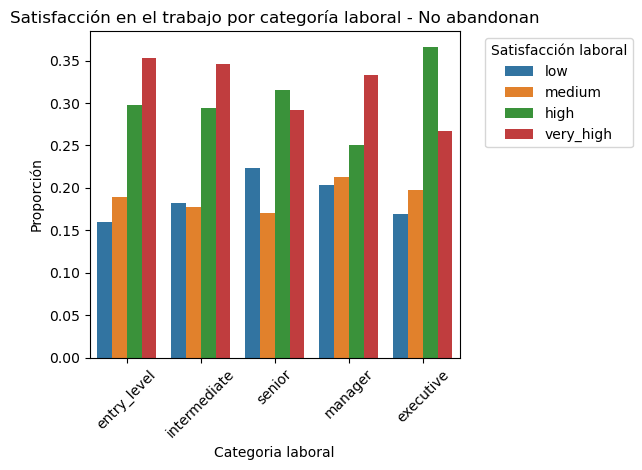

In [200]:
df = pd.read_csv("df_final.csv")
df = df[df['attrition'] == 'no']

# Orden específico
satisfaction_order = ['low', 'medium', 'high', 'very_high']
job_level_order = ['entry_level', 'intermediate', 'senior', 'manager', 'executive']

# Convertir a categóricas ordenadas
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=satisfaction_order, ordered=True)
df['job_level'] = pd.Categorical(df['job_level'], categories=job_level_order, ordered=True)

# Agrupar y calcular proporciones
prop_df = df.groupby(['job_level', 'job_satisfaction']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_level')['count'].transform('sum')

# Gráfico
sns.barplot(data=prop_df, x='job_level', y='percentage', hue='job_satisfaction')
plt.title('Satisfacción en el trabajo por categoría laboral - No abandonan')
plt.ylabel('Proporción')
plt.xlabel('Categoria laboral')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Satisfacción laboral')
plt.tight_layout()
plt.show()

In [201]:
df = pd.read_csv("df_final.csv")
df['attrition_bin'] = df['attrition'].map({'yes': 1, 'no': 0})
orden = ['low', 'medium', 'high', 'very_high']

tukey = pairwise_tukeyhsd(
    endog=df['attrition_bin'],            
    groups=df['job_level'],        
    alpha=0.05                            
)

print(tukey)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
 entry_level    executive  -0.1953 0.0001 -0.3148 -0.0758   True
 entry_level intermediate  -0.1606    0.0 -0.2176 -0.1036   True
 entry_level      manager  -0.2168    0.0 -0.3175 -0.1162   True
 entry_level       senior  -0.1123 0.0004 -0.1872 -0.0375   True
   executive intermediate   0.0347 0.9323 -0.0846   0.154  False
   executive      manager  -0.0215 0.9944 -0.1669  0.1238  False
   executive       senior    0.083 0.3983 -0.0459  0.2118  False
intermediate      manager  -0.0563 0.5441 -0.1568  0.0443  False
intermediate       senior   0.0483 0.3945 -0.0264  0.1229  False
     manager       senior   0.1045 0.0791 -0.0071  0.2161  False
----------------------------------------------------------------


## SLIDE 6

In [202]:
df.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_number',
       'environment_satisfaction', 'gender', 'hourly_rate', 'job_involvement',
       'job_level', 'job_role', 'job_satisfaction', 'marital_status',
       'monthly_income', 'monthly_rate', 'num_companies_worked', 'overtime',
       'percent_salary_hike', 'performance_rating',
       'relationship_satisfaction', 'standard_hours', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_since_last_promotion',
       'years_with_curr_manager', 'date_birth', 'salary', 'remote_work',
       'iter_hourly_rate', 'iter_total_working_years', 'iter_monthly_income',
       'iter_salary', 'knn_hourly_rate', 'knn_total_working_years',
       'knn_monthly_income', 'knn_salary', 'attrition_bin'],
      dtype='object')

In [220]:
df = pd.read_csv("df_final.csv")

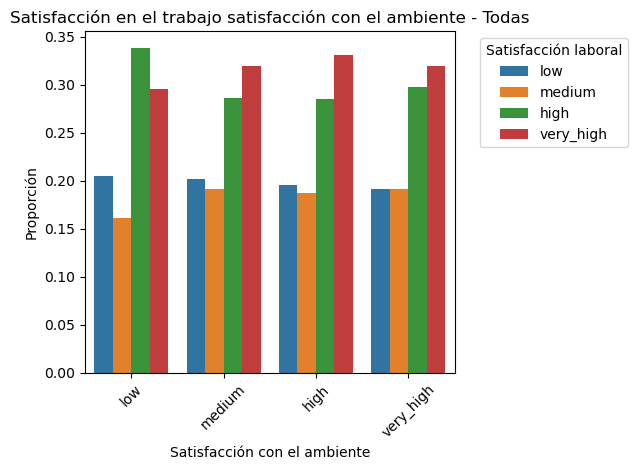

In [223]:
df = pd.read_csv("df_final.csv")

# Orden específico
satisfaction_order = ['low', 'medium', 'high', 'very_high']
balance_order = ['low', 'medium', 'high', 'very_high']

# Convertir a categóricas ordenadas
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=satisfaction_order, ordered=True)
df['environment_satisfaction'] = pd.Categorical(df['environment_satisfaction'], categories=balance_order, ordered=True)

# Agrupar y calcular proporciones
prop_df = df.groupby(['environment_satisfaction', 'job_satisfaction']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('environment_satisfaction')['count'].transform('sum')

# Gráfico
sns.barplot(data=prop_df, x='environment_satisfaction', y='percentage', hue='job_satisfaction')
plt.title('Satisfacción en el trabajo satisfacción con el ambiente - Todas')
plt.ylabel('Proporción')
plt.xlabel('Satisfacción con el ambiente')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Satisfacción laboral')
plt.tight_layout()
plt.show()

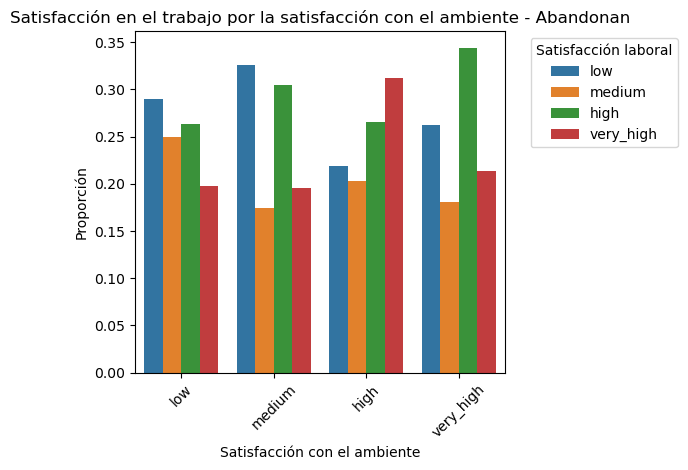

In [245]:
df = pd.read_csv("df_final.csv")
df = df[df['attrition'] == 'yes']

# Orden específico
satisfaction_order = ['low', 'medium', 'high', 'very_high']
balance_order = ['low', 'medium', 'high', 'very_high']

# Convertir a categóricas ordenadas
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=satisfaction_order, ordered=True)
df['environment_satisfaction'] = pd.Categorical(df['environment_satisfaction'], categories=balance_order, ordered=True)

# Agrupar y calcular proporciones
prop_df = df.groupby(['environment_satisfaction', 'job_satisfaction']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('environment_satisfaction')['count'].transform('sum')

# Gráfico
sns.barplot(data=prop_df, x='environment_satisfaction', y='percentage', hue='job_satisfaction')
plt.title('Satisfacción en el trabajo por la satisfacción con el ambiente - Abandonan')
plt.ylabel('Proporción')
plt.xlabel('Satisfacción con el ambiente')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Satisfacción laboral')
plt.tight_layout()
plt.show()

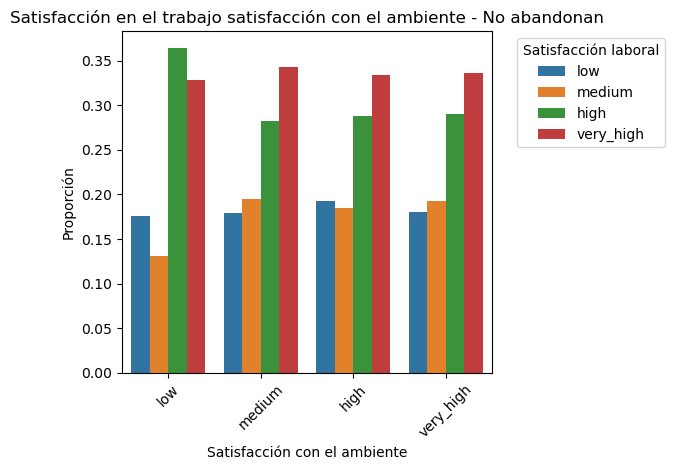

In [225]:
df = pd.read_csv("df_final.csv")
df = df[df['attrition'] == 'no']

# Orden específico
satisfaction_order = ['low', 'medium', 'high', 'very_high']
balance_order = ['low', 'medium', 'high', 'very_high']

# Convertir a categóricas ordenadas
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=satisfaction_order, ordered=True)
df['environment_satisfaction'] = pd.Categorical(df['environment_satisfaction'], categories=balance_order, ordered=True)

# Agrupar y calcular proporciones
prop_df = df.groupby(['environment_satisfaction', 'job_satisfaction']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('environment_satisfaction')['count'].transform('sum')

# Gráfico
sns.barplot(data=prop_df, x='environment_satisfaction', y='percentage', hue='job_satisfaction')
plt.title('Satisfacción en el trabajo satisfacción con el ambiente - No abandonan')
plt.ylabel('Proporción')
plt.xlabel('Satisfacción con el ambiente')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Satisfacción laboral')
plt.tight_layout()
plt.show()

In [231]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

In [236]:
df = pd.read_csv("df_final.csv")

# Filtrar valores válidos
df = df[df['environment_satisfaction'].notna()]

# Mapear attrition a binaria
df['attrition_bin'] = df['attrition'].map({'yes': 1, 'no': 0})

# Ordenar niveles de satisfacción
orden = ['low', 'medium', 'high', 'very_high']
df['environment_satisfaction'] = pd.Categorical(df['environment_satisfaction'], categories=orden, ordered=True)

# Test de Tukey
tukey = pairwise_tukeyhsd(
    endog=df['attrition_bin'],
    groups=df['environment_satisfaction'],
    alpha=0.05
)

print(tukey)


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower   upper  reject
-------------------------------------------------------
  high       low   0.1156 0.0001  0.0454  0.1858   True
  high    medium   0.0154 0.9424 -0.0549  0.0858  False
  high very_high  -0.0068 0.9922 -0.0691  0.0555  False
   low    medium  -0.1002  0.005 -0.1776 -0.0227   True
   low very_high  -0.1224    0.0 -0.1926 -0.0522   True
medium very_high  -0.0223 0.8473 -0.0926   0.048  False
-------------------------------------------------------


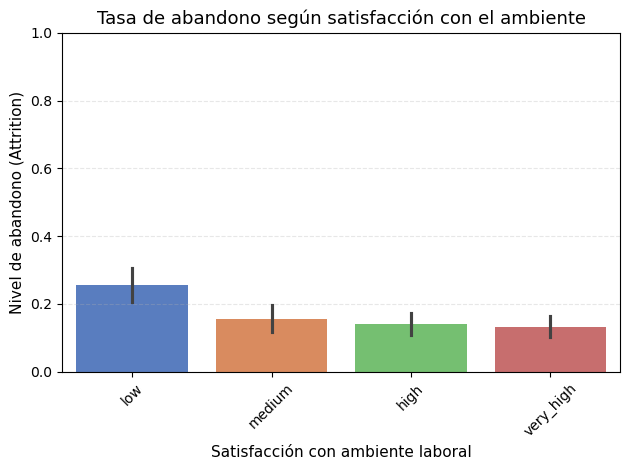

In [241]:
df = pd.read_csv("df_final.csv")
df['attrition_bin'] = df['attrition'].map({'yes': 1, 'no': 0})

orden = ['low', 'medium', 'high', 'very_high']

sns.barplot(
    x='environment_satisfaction',
    y='attrition_bin',
    data=df,
    palette='muted',
    order=orden 
)

plt.title("Tasa de abandono según satisfacción con el ambiente", fontsize=13)
plt.xlabel("Satisfacción con ambiente laboral", fontsize=11)
plt.ylabel("Nivel de abandono (Attrition)", fontsize=11)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

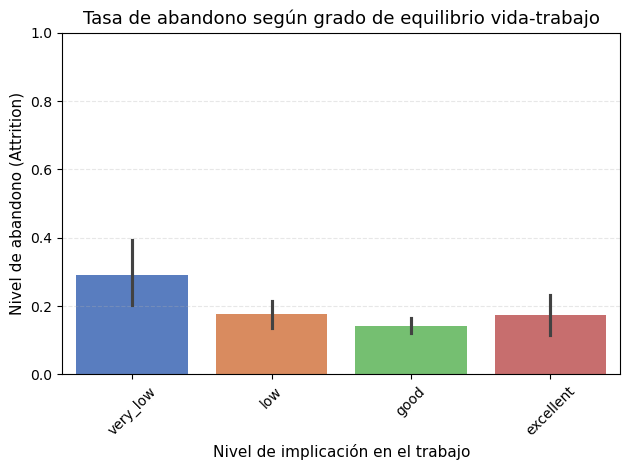

In [ ]:
df = pd.read_csv("df_final.csv")
df['attrition_bin'] = df['attrition'].map({'yes': 1, 'no': 0})

orden = ['very_low', 'low', 'good', 'excellent']

sns.barplot(
    x='work_life_balance',
    y='attrition_bin',
    data=df,
    palette='muted',
    order=orden 
)

plt.title("Tasa de abandono según grado de equilibrio vida-trabajo", fontsize=13)
plt.xlabel("Equilibrio vida-trabajo", fontsize=11)
plt.ylabel("Nivel de abandono (Attrition)", fontsize=11)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [237]:
df['job_involvement'].unique()

array(['high', 'medium', 'very_high', 'low'], dtype=object)

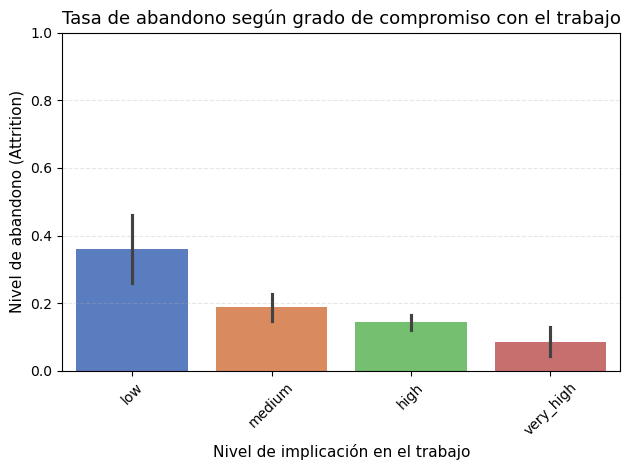

In [240]:
df = pd.read_csv("df_final.csv")
df['attrition_bin'] = df['attrition'].map({'yes': 1, 'no': 0})

orden = ['low', 'medium', 'high', 'very_high']

sns.barplot(
    x='job_involvement',
    y='attrition_bin',
    data=df,
    palette='muted',
    order=orden 
)

plt.title("Tasa de abandono según grado de compromiso con el trabajo", fontsize=13)
plt.xlabel("Nivel de implicación en el trabajo", fontsize=11)
plt.ylabel("Nivel de abandono (Attrition)", fontsize=11)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

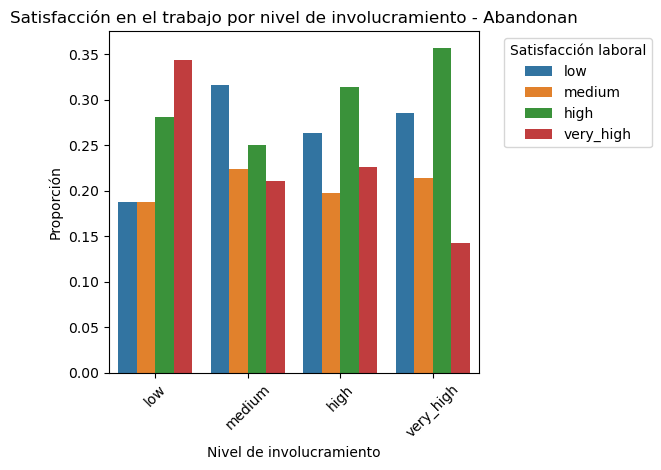

In [247]:
df = pd.read_csv("df_final.csv")
df = df[df['attrition'] == 'yes']

# Orden específico
satisfaction_order = ['low', 'medium', 'high', 'very_high']
involvement_order = ['low', 'medium', 'high', 'very_high']

# Convertir a categóricas ordenadas
df['job_satisfaction'] = pd.Categorical(df['job_satisfaction'], categories=satisfaction_order, ordered=True)
df['job_involvement'] = pd.Categorical(df['job_involvement'], categories=involvement_order, ordered=True)

# Agrupar y calcular proporciones
prop_df = df.groupby(['job_involvement', 'job_satisfaction']).size().reset_index(name='count')
prop_df['percentage'] = prop_df['count'] / prop_df.groupby('job_involvement')['count'].transform('sum')

# Gráfico
sns.barplot(data=prop_df, x='job_involvement', y='percentage', hue='job_satisfaction')
plt.title('Satisfacción en el trabajo por nivel de involucramiento - Abandonan')
plt.ylabel('Proporción')
plt.xlabel('Nivel de involucramiento')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Satisfacción laboral')
plt.tight_layout()
plt.show()